# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# auto structuring cells
%load_ext nb_black

import numpy as np
import pandas as pd

# visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [2]:
sns.set_theme(style="darkgrid")

data = pd.read_csv("stock_data.csv")  # imports data
data.head()  # shows top 5 rows of data

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

<IPython.core.display.Javascript object>

In [3]:
df = data.copy()  # sets copy of data as df

<IPython.core.display.Javascript object>

In [4]:
df.shape  # shows number of rows and columns in data respectfully

(340, 15)

<IPython.core.display.Javascript object>

In [5]:
df.info()  # shows data types of each column in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [6]:
df.describe(include="all").T  # data summary based on columns

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                LNT    1   
Security                                        Pulte Homes Inc.    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327937   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding   577028337.754029   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

<IPython.core.display.Javascript object>

In [7]:
df.isnull().sum()  # count of null values in data distinguished by column

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
df.duplicated().sum()  # count of duplicated values in data

0

<IPython.core.display.Javascript object>

## Data Overview

- Observations
    - There are only 340 rows of data meaning there will be no long computational time and no true accuracy with the data compared to large sets.
    - There are no duplicated or missing values
    - Ticker Symbol and Security can be dropped since they only contain unique values.
    - Most numerical columns seem to be right-skewed and contain outliers.
    - Data must be scaled as Net Cash Flow, Net Income, and Estimated Shares Oustanding will over power other columns when creating clusters.

In [9]:
for header in df.columns:
    header_replace = header.replace(
        " ", "_"
    )  # creates new header with "_" instead of " ".
    df.rename(
        {header: header_replace}, axis=1, inplace=True
    )  # sets new header as header made in line above
df.head()  # shows first five rows of data

Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="maroon",
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="slateblue"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

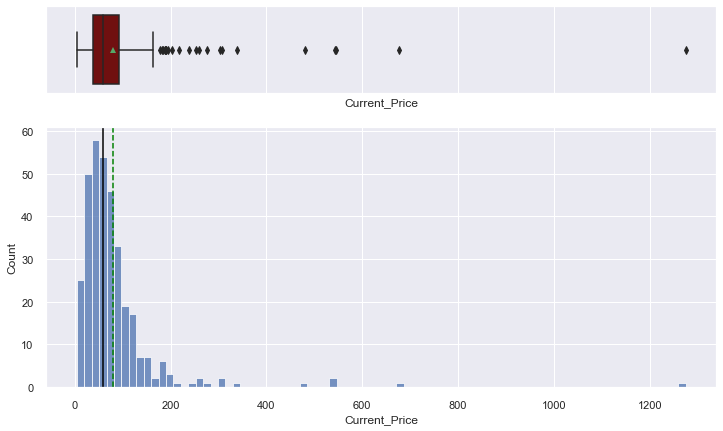

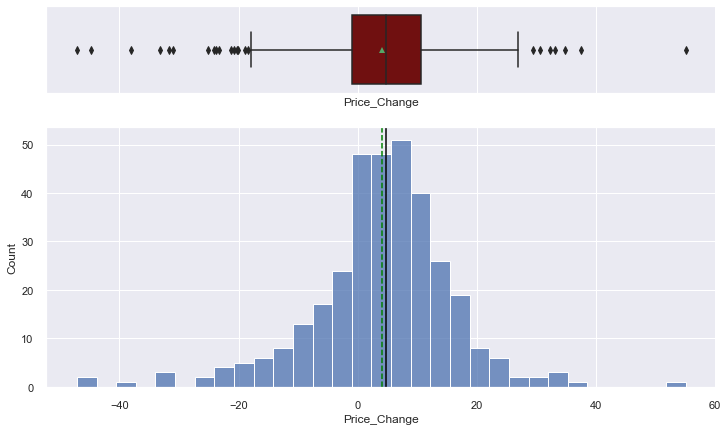

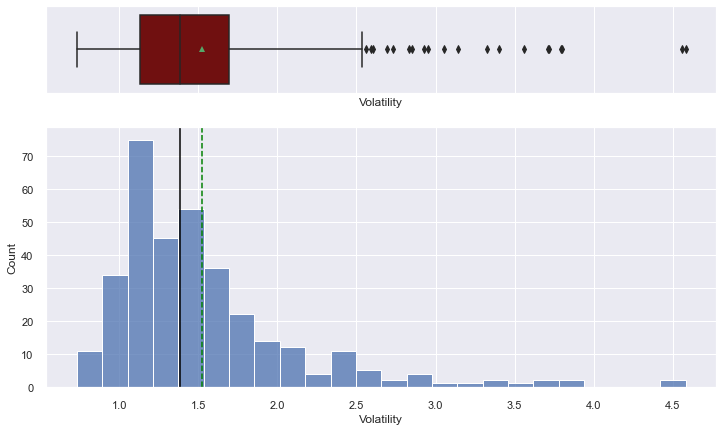

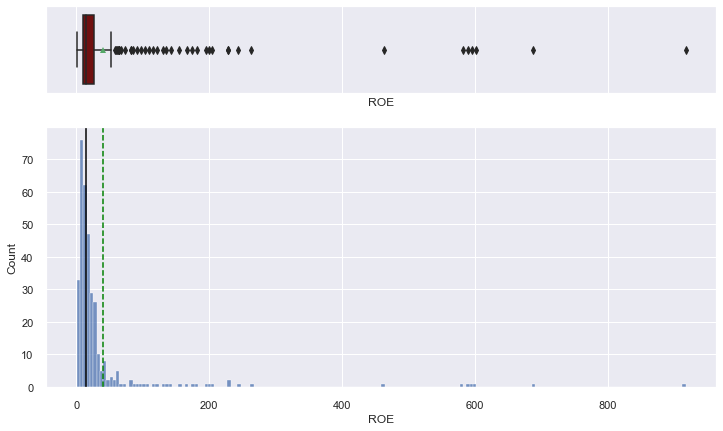

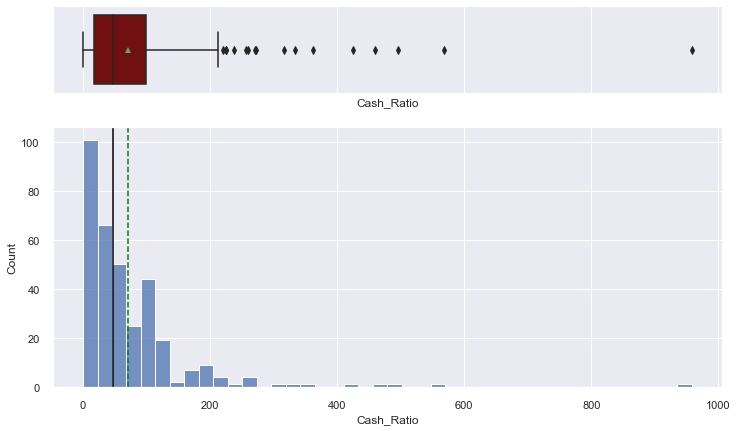

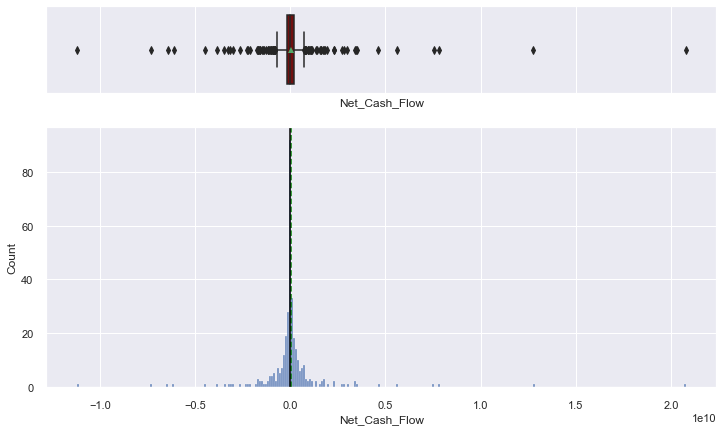

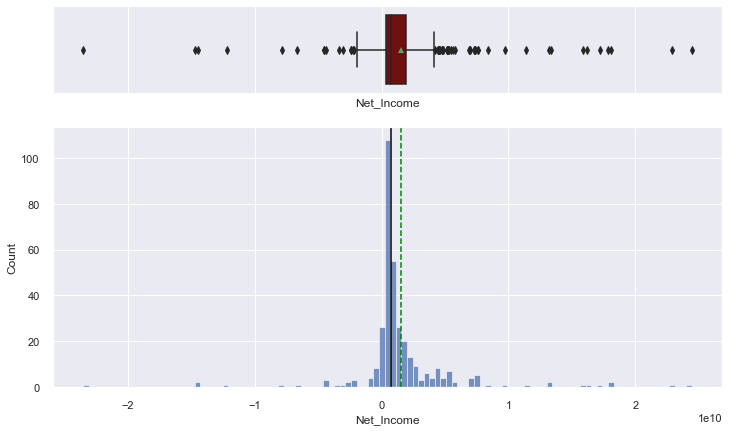

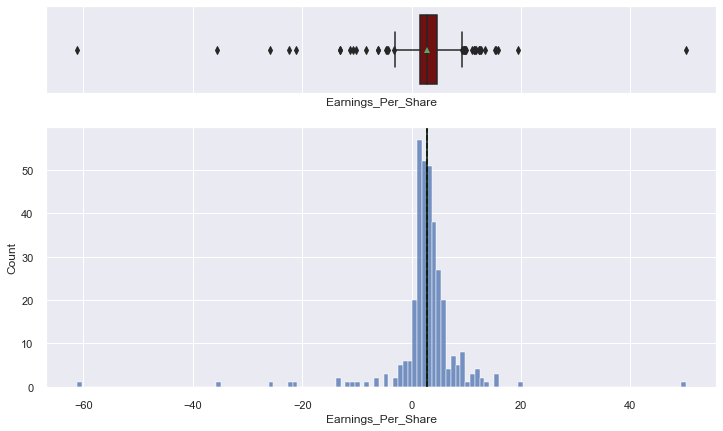

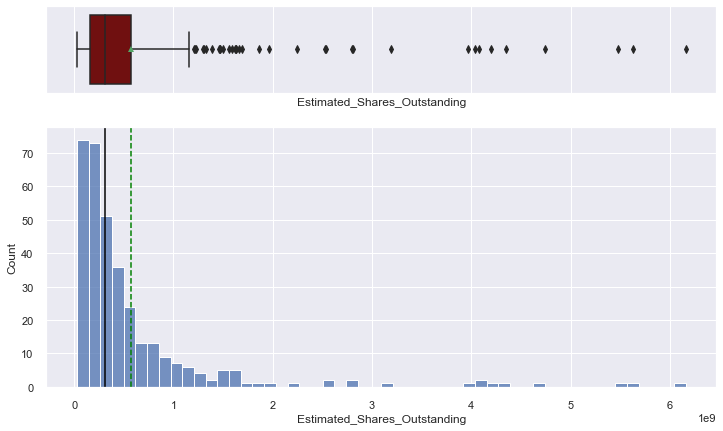

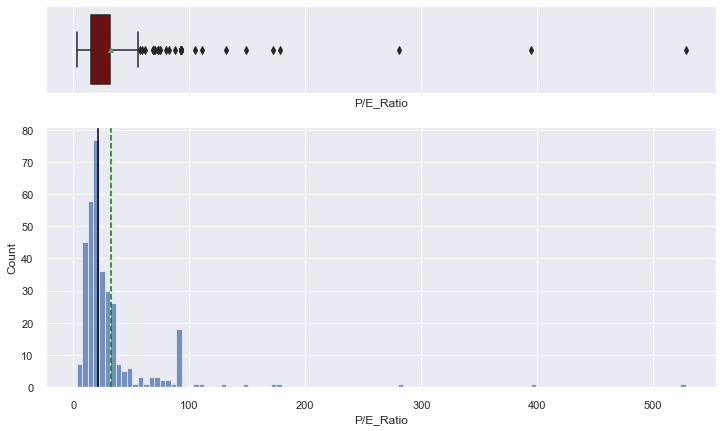

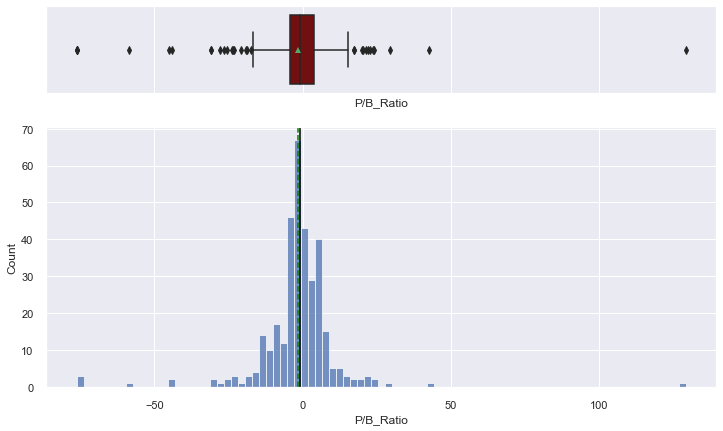

<IPython.core.display.Javascript object>

In [11]:
for col in df.select_dtypes(
    include=np.number
):  # iterates through each column of type numeric in data
    histogram_boxplot(
        data=df, feature=col
    )  # creates boxplot and histogram plot of each column of data type numeric

In [12]:
df[df["Current_Price"] > 1200]

Ticker_Symbol           Security             GICS_Sector  \
243          PCLN  Priceline.com Inc  Consumer Discretionary   

                      GICS_Sub_Industry  Current_Price  Price_Change  \
243  Internet & Direct Marketing Retail    1274.949951      3.190527   

     Volatility  ROE  Cash_Ratio  Net_Cash_Flow  Net_Income  \
243     1.26834   29         184    -1671386000  2551360000   

     Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
243               50.09                   50935516.07  25.453183  -1.052429

<IPython.core.display.Javascript object>

In [13]:
df[df["ROE"] > 800]

Ticker_Symbol            Security GICS_Sector  \
30           APA  Apache Corporation      Energy   

                     GICS_Sub_Industry  Current_Price  Price_Change  \
30  Oil & Gas Exploration & Production      44.470001     11.397804   

    Volatility  ROE  Cash_Ratio  Net_Cash_Flow   Net_Income  \
30    2.405408  917          80      698000000 -23528000000   

    Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
30               -61.2                   384444444.4  93.089287   4.970809

<IPython.core.display.Javascript object>

In [14]:
df[df["Cash_Ratio"] > 800]

Ticker_Symbol  Security             GICS_Sector  \
125            FB  Facebook  Information Technology   

                GICS_Sub_Industry  Current_Price  Price_Change  Volatility  \
125  Internet Software & Services     104.660004      16.22432    1.320606   

     ROE  Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
125    8         958      592000000  3669000000                1.31   

     Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
125                  2.800763e+09  79.893133   5.884467

<IPython.core.display.Javascript object>

In [15]:
df[df["P/B_Ratio"] > 100]

Ticker_Symbol               Security             GICS_Sector  \
6           ADS  Alliance Data Systems  Information Technology   

                       GICS_Sub_Industry  Current_Price  Price_Change  \
6  Data Processing & Outsourced Services     276.570007      6.189286   

   Volatility  ROE  Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
6    1.116976   30          25       90885000   596541000                8.91   

   Estimated_Shares_Outstanding  P/E_Ratio   P/B_Ratio  
6                   66951851.85  31.040405  129.064585

<IPython.core.display.Javascript object>

#### Observations:
- The outliers are present in every feature
    - Outliers should be left. They seem to be different companies, meaning those specialize in those areas and should be left as this will exist in the real world. 
- Net Cash Flow has many more outliers compared to the others.
- Current Price, Volatility, ROE, Cash Ratio, Estimated Shares Outstanding, and P/E Ratio are right-skewed as well.

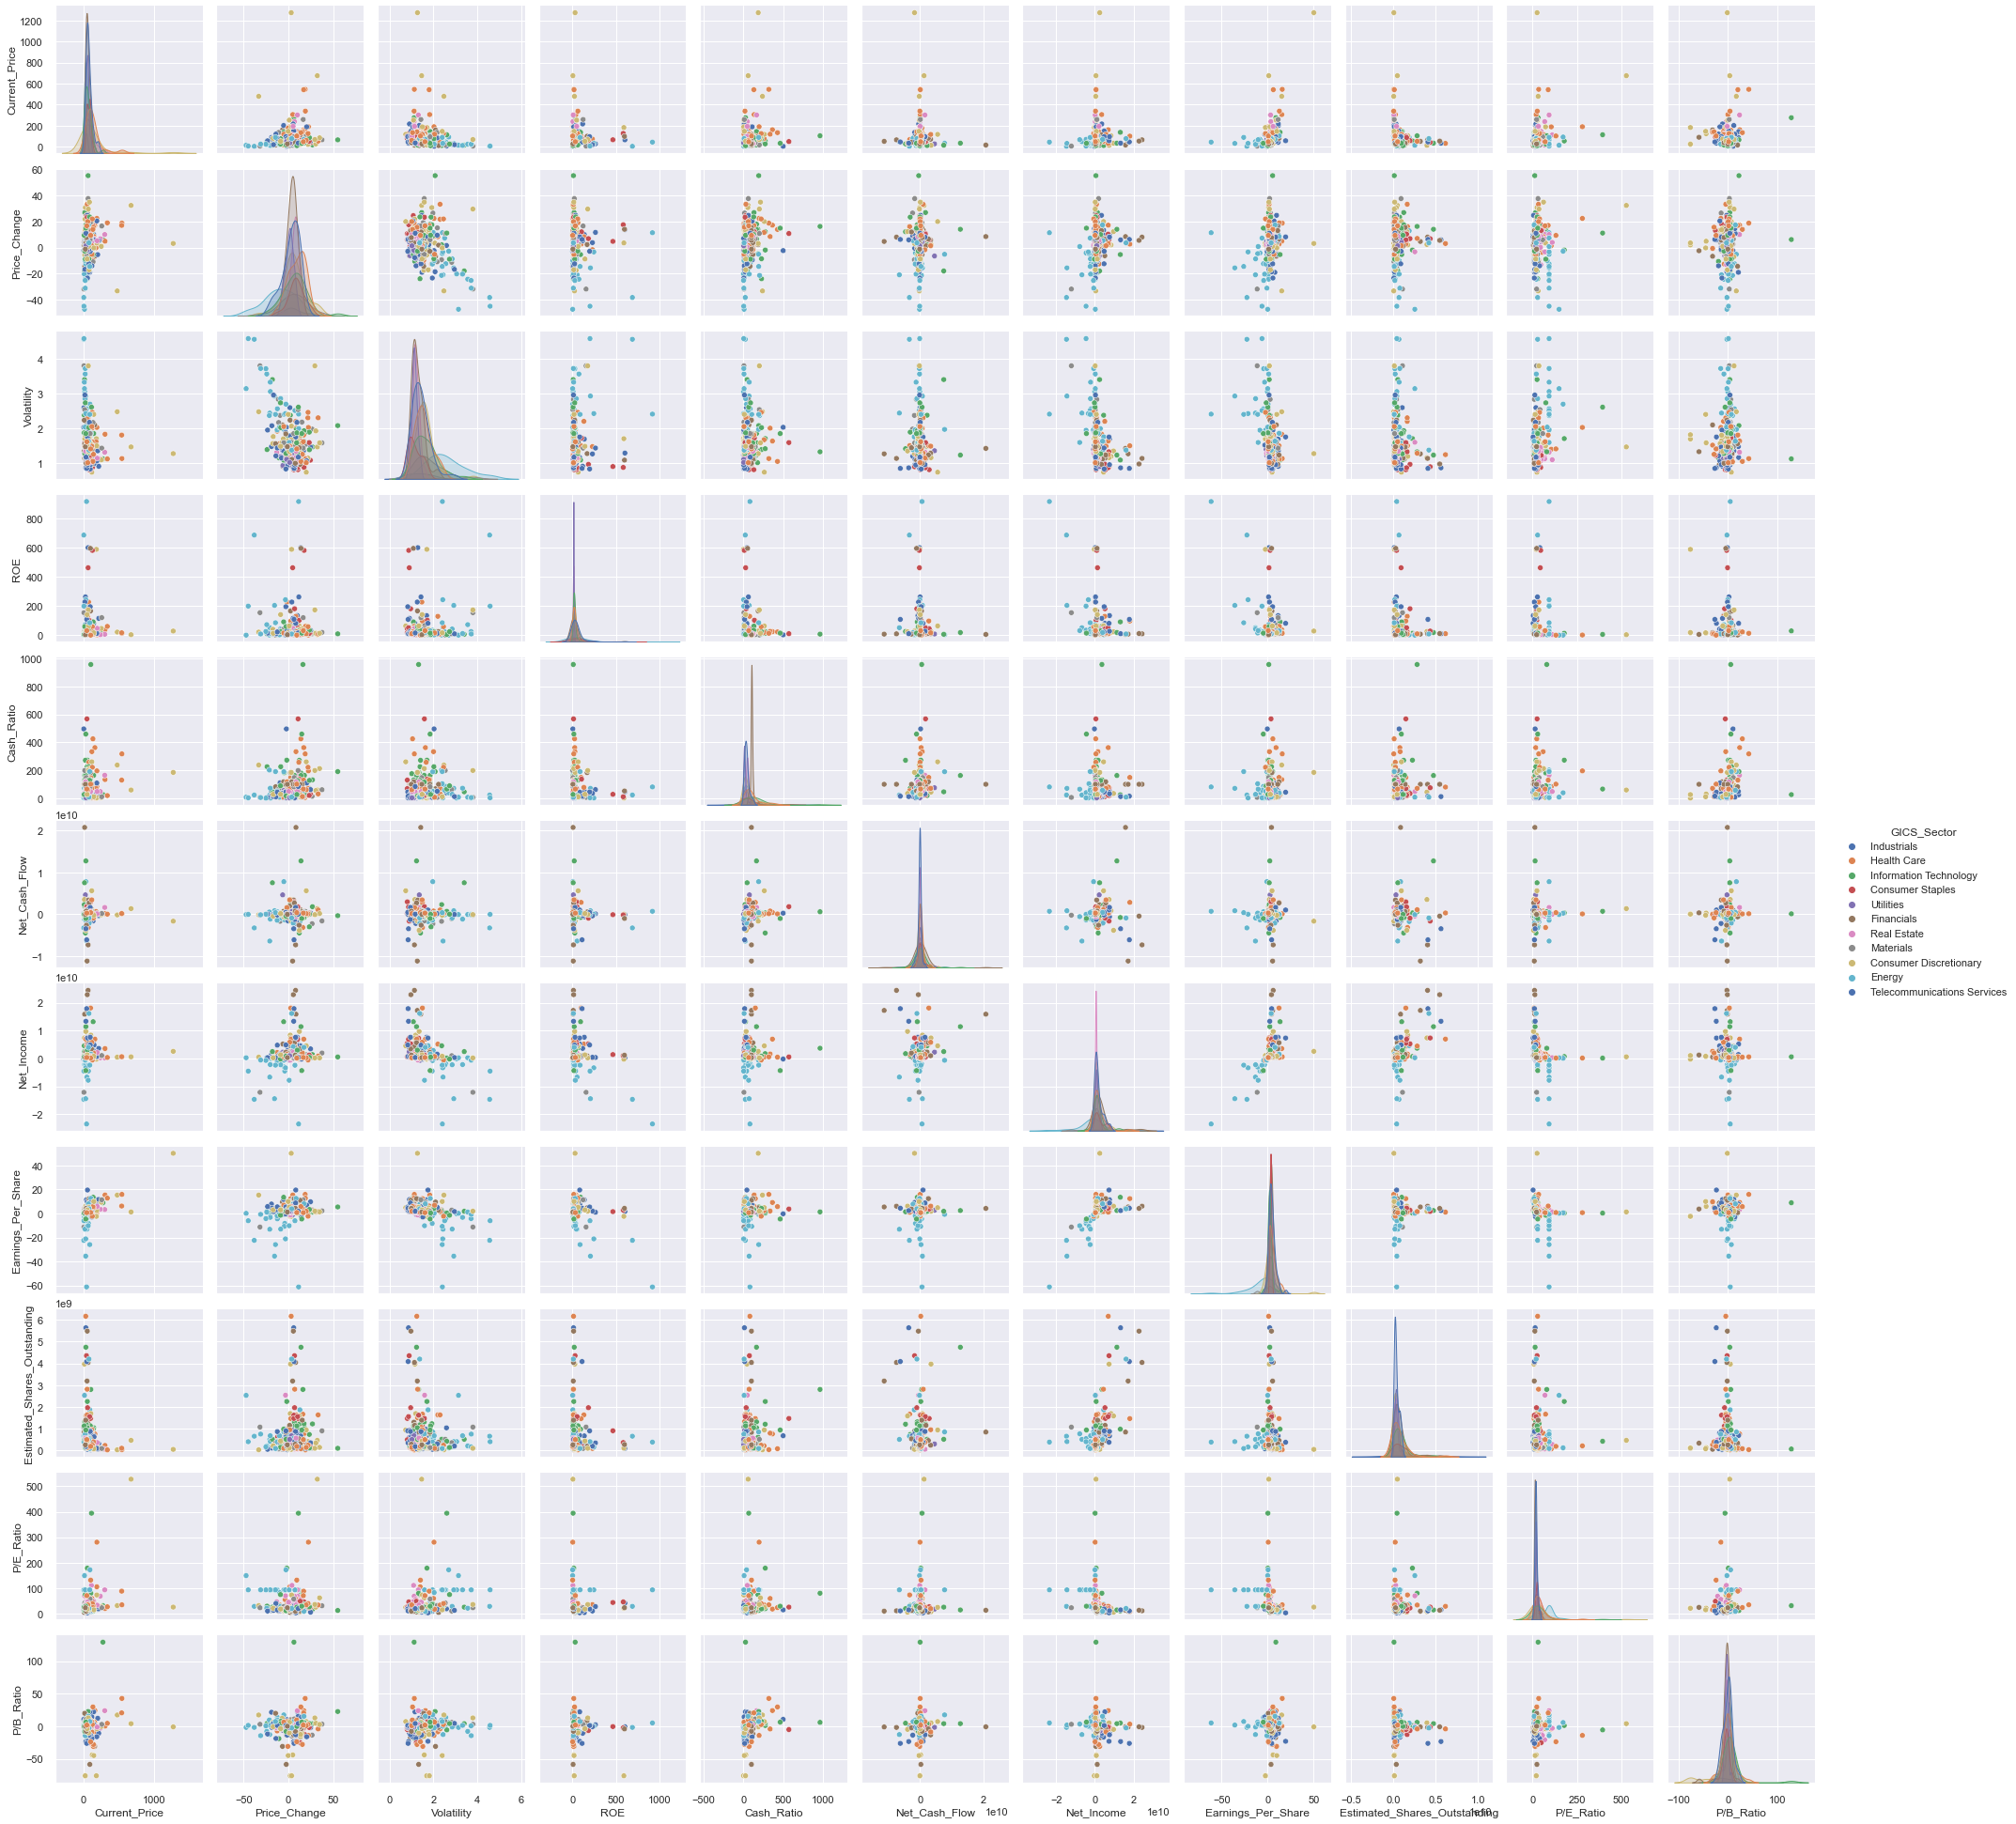

<IPython.core.display.Javascript object>

In [16]:
sns.pairplot(
    data=df, hue="GICS_Sector", palette="deep"
)  # creates pairplot of all the columns with values sorted by GICS Sector

<AxesSubplot:>

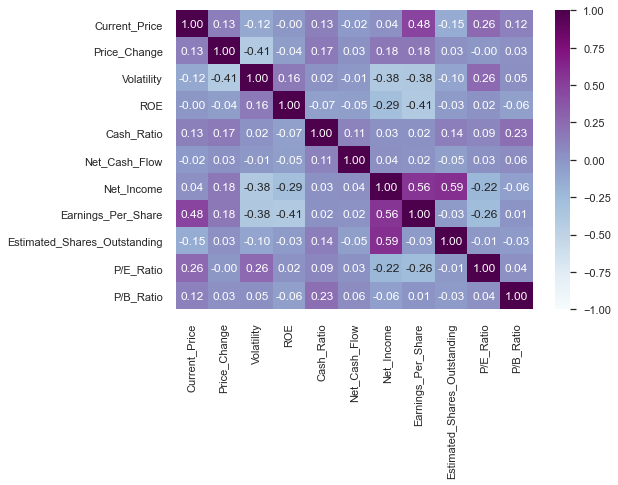

<IPython.core.display.Javascript object>

In [17]:
# creates heatmap showing correlation of numeric columns in data
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="BuPu", annot=True, fmt=".2f")

#### Observations:
- There seems to be no real correlation between values, maybe aside Net Income vs Earnings Per Share and Net Income vs Estimated Shares Outstanding.
- The features seem to need no form of imputation or manipulation (except for maybe outlier treatment), and should be able to move into clustering.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

## 1. What does the distribution of stock prices look like?

<AxesSubplot:xlabel='Current_Price', ylabel='Count'>

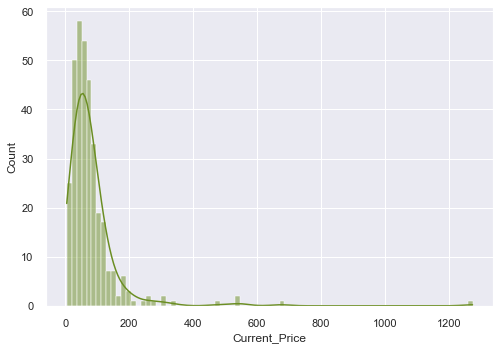

<IPython.core.display.Javascript object>

In [18]:
# creates histplot of current stock prices column
sns.histplot(data=df, x="Current_Price", kde=True, color="olivedrab")

#### Observations:
- The distribution is right-skewed, with one large outlier over 1200.

## 2. The stocks of which economic sector have seen the maximum price increase on average?

In [19]:
def labeled_barplot(data, feature, groupby, estimator=np.mean):

    """
    Creates a labeled barplot showing the metric given by the estimator of a feature that is grouped by groupby
    
    data: dataframe
    feature: dataframe column
    groupby: column that the feature is being grouped by
    estimator: metric used to evaluate how the bar sizes are determined
    """

    plt.xticks(rotation=75)  # rotate xticks 75 degrees so they are clearly legible

    # creates barplot showing features
    ax = sns.barplot(
        data=data,
        y=feature,
        x=groupby,
        estimator=estimator,  # sets evaluation metric, can be changed to mean, median, sum, etc...
        ci=None,  # removes confidence interval visual
        palette="deep",
        order=df.groupby(groupby)[feature]
        .mean()
        .sort_values(ascending=False)
        .index,  # sets order of bars as descending
    )

    for p in ax.patches:
        label = "{:.1f}".format(p.get_height())  # creates label for each bar
        x = p.get_x()  # sets x as x value of particular bar
        y = p.get_height()  # sets y as height of particular bar
        if y > 0:
            ax.annotate(
                text=label,
                xy=(x, y),
                ha="center",
                va="center",
                xytext=(15, 5),
                textcoords="offset points",
            )  # sets label text and position of bar annotation
        else:
            ax.annotate(
                text=label,
                xy=(x, y),
                ha="center",
                va="center",
                xytext=(15, -7),
                textcoords="offset points",
            )  # sets label text and position of bar annotation

    plt.show()  # shows plot

<IPython.core.display.Javascript object>

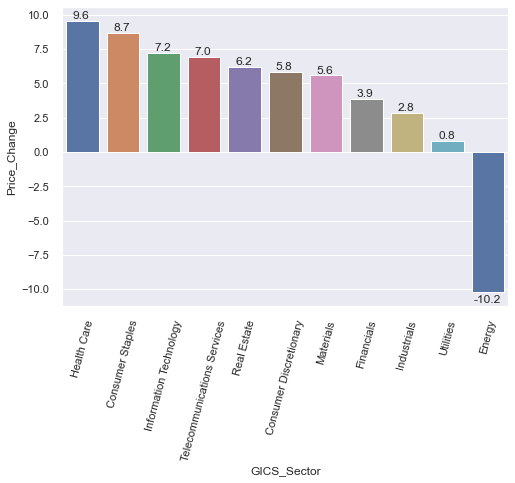

<IPython.core.display.Javascript object>

In [20]:
# creates labeled barplot of average Price Change per GICS Sector
labeled_barplot(data=df, feature="Price_Change", groupby="GICS_Sector")

#### Observations:
- Health Care has the most positive price change, followed in a slow descending order by customer staples, information technology, telecommunications services, real estate, consumer discretionary, materials, financials, and industrials. There is a sharper drop to utilities, and a very sharp drop to -10.2 to energy.
- Energy has by far the worst price change of all sectors, and could be clustered in its own seperate group.

## 3. How are the different variables correlated with each other?

<AxesSubplot:>

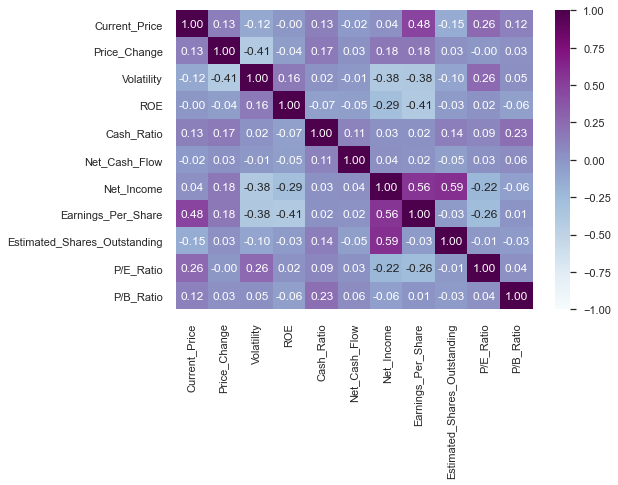

<IPython.core.display.Javascript object>

In [21]:
# creates heatmap showing correlation of numeric columns in data
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="BuPu", annot=True, fmt=".2f")

#### Observations:
- There seems to be no real correlation between values, maybe aside Net Income vs Earnings Per Share and Net Income vs Estimated Shares Outstanding.
- The features seem to need no form of imputation or manipulation (except for maybe outlier treatment), and should be able to move into clustering.

## 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

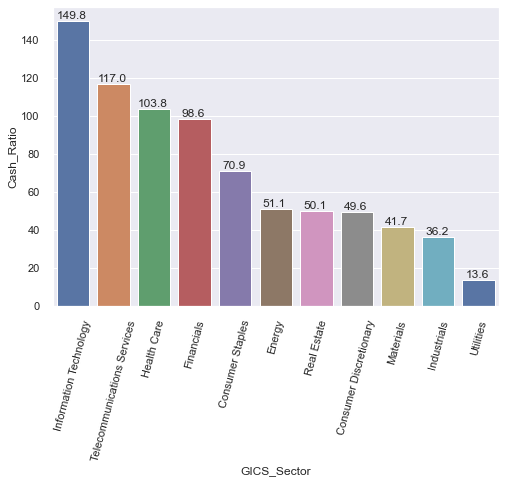

<IPython.core.display.Javascript object>

In [22]:
# creates labeled barplot of average Cash Ratio per GICS Sector
labeled_barplot(data=df, feature="Cash_Ratio", groupby="GICS_Sector")

#### Observations:
- Information Technology is by far the best in covering short term obligations.
- The next tier seems to be Telecommunications, Health Care, and Financials
- Third tier is Consumer Staple
    - This may get put into tier 4 since it is a stand alone sector in one tier
- Fourth tier is Energy, Real Estate, Consumer Discretionary, Materials, and Industrials
- The last tier is Utilities 

## 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

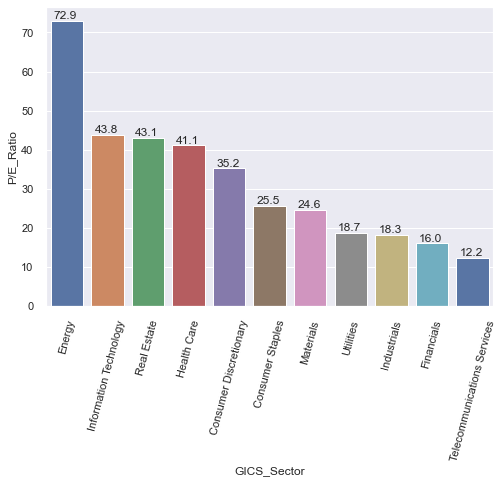

<IPython.core.display.Javascript object>

In [23]:
# creates labeled barplot of average P/E Ratio per GICS Sector
labeled_barplot(data=df, feature="P/E_Ratio", groupby="GICS_Sector")

#### Observations:
- Energy is by far the best when it comes to the value of a company's shares.

- Tiers:
    - Energy has by far the most value per a company's share.
    - The next tier seems to be Information Technology, Real Estate, Health Care, and Consumer Discretionary.
    - Third tier is Consumer Staple and Materials.
    - Fourth and last tier is comprised of Utilities, Industrials, Financials, and Telecommunications Services.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

###  Outlier Check

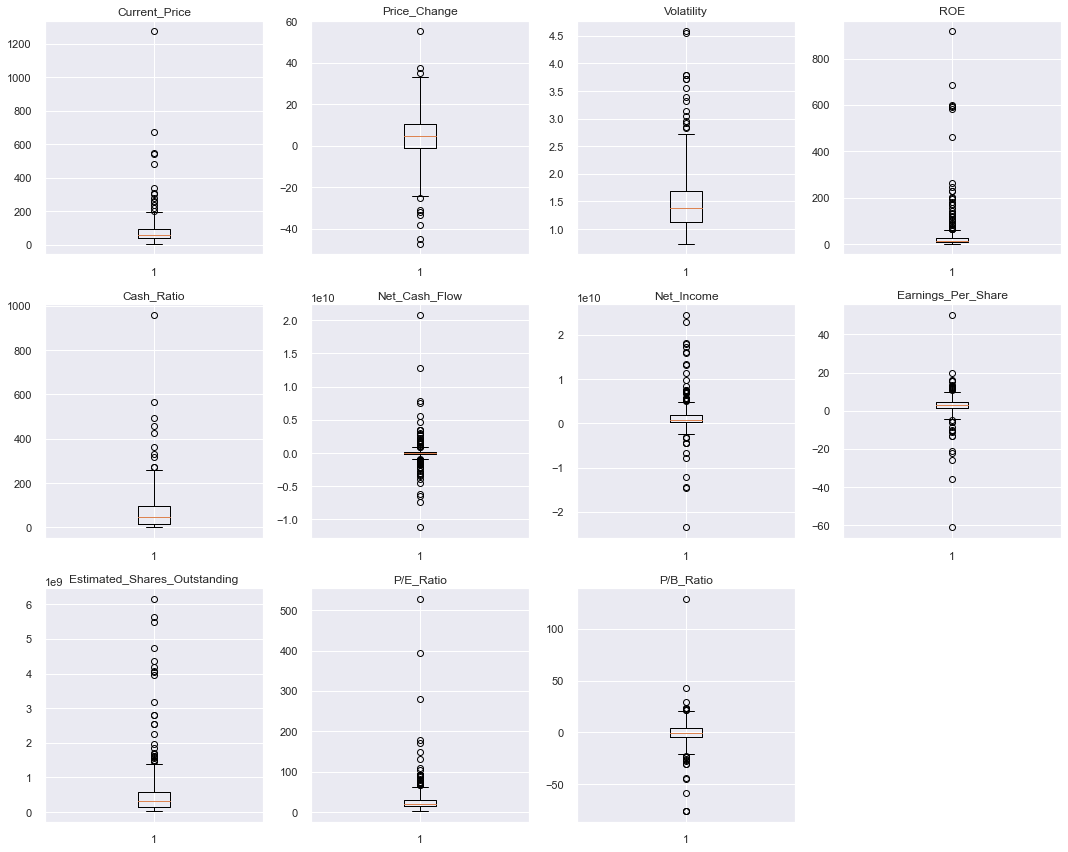

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(15, 12))

numeric_cols = df.select_dtypes(
    include=np.number
).columns.tolist()  # creates list of columns that are only numeric.

for i, variable in enumerate(numeric_cols):
    plt.subplot(3, 4, i + 1)  # sets subplot for particular numeric columns
    plt.boxplot(
        df[variable], whis=2
    )  # creates boxplot of column with whiskers set at 2
    plt.tight_layout()
    plt.title(variable)  # sets title to the column of the particular boxplot

# shows all plots together in subplot matrix
plt.show()

#### Observations:
- Many outliers are present, but will not treat outliers since the outliers seem possible for certain stocks.

## EDA

- It is a good idea to explore the data once again after manipulating it.
    - Do not need to do more EDA since there is no data manipulation.

## Scaling Data

In [25]:
scaler = StandardScaler()  # sets scaling used as StandardScaler
subset = df[numeric_cols]  # creates subset of df for only numeric values
subset_scaled = scaler.fit_transform(
    subset
)  # scales subset in preperation for clustering

<IPython.core.display.Javascript object>

In [26]:
subset_scaled_df = pd.DataFrame(
    subset_scaled, columns=subset.columns
)  # creates DataFrame of scaled subset
subset_scaled_df.sample(10)

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
47       -0.083059      1.039116   -0.235718 -0.182532   -0.664799   
261      -0.456153      1.115888    0.676526 -0.317379   -0.498664   
277       1.160012      0.100647   -0.660708  0.087163   -0.255000   
184      -0.326341     -0.197942    0.073090 -0.265515   -0.498664   
300      -0.002577     -1.753862    0.394038 -0.265515   -0.476513   
167      -0.474027      0.830526   -0.507599 -0.213650    1.018698   
103      -0.545214      0.674393   -0.197443 -0.141040    2.225942   
117      -0.127691      0.069465   -0.522189 -0.389989   -0.288227   
122       0.075044      0.821113   -0.575226 -0.213650   -0.343605   
22        0.805812     -0.891636    0.959660 -0.224023   -0.033488   

     Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
47       -0.011802   -0.308433           -0.110467   
261      -0.444321   -0.067707           -0.270088   
277       0.017141    0.163938            0.471769   
184      -0.092054   -0.175757            0.166209   
300      -0.266972   -0.320717            0.038512   
167       6.530207    2.522808           -0.055740   
103      -2.341927    0.058616           -0.204719   
117      -0.065142   -0.419667           -0.572608   
122      -0.014099   -0.279445           -0.181916   
22       -0.021784   -0.248677            1.020561   

     Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  
47                      -0.520958   0.064708  -0.156127  
261                      0.770741   0.081011   0.512843  
277                     -0.252413   0.010285   0.032189  
184                     -0.437556  -0.451056   0.101132  
300                     -0.430296  -0.266300   0.061734  
167                      4.927229  -0.413652   0.406789  
103                      0.745041  -0.302501   0.453161  
117                     -0.495748  -0.319668   0.565902  
122                     -0.387234   0.524271  -0.891501  
22                      -0.618816  -0.356296  -2.100701

<IPython.core.display.Javascript object>

## K-means Clustering

### Distortions

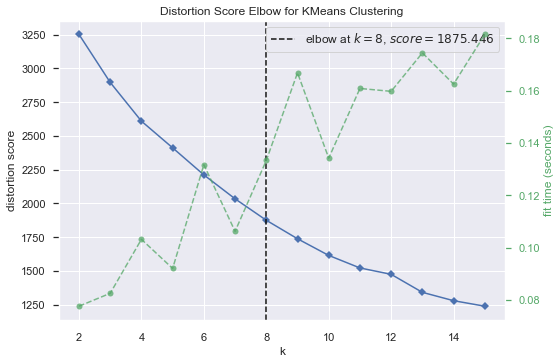

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

<IPython.core.display.Javascript object>

In [27]:
visualizer_distortion = KElbowVisualizer(
    KMeans(random_state=1), k=(2, 16)
)  # sets distortion k elbow visualizer as KMeans

visualizer_distortion.fit(subset_scaled_df)  # fits distortion k elbow visualizer
visualizer_distortion.show()  # shows distortion k elbow visualizer

#### Observations:
- Appropraite number of clusters seems to be 8.

### Silhouette Score

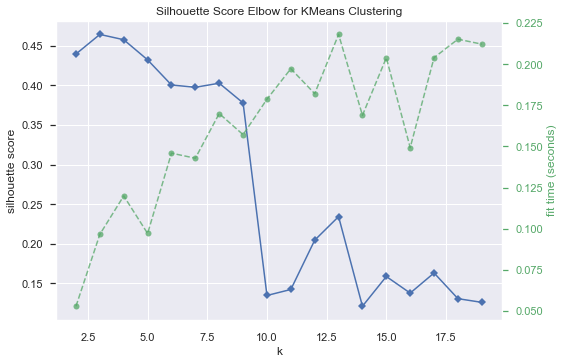

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

<IPython.core.display.Javascript object>

In [28]:
visualizer_silhouette = KElbowVisualizer(
    KMeans(random_state=1), k=(2, 20), metric="silhouette", locate_elbow=False
)  # sets silhouette k elbow visualizer as KMeans

visualizer_silhouette.fit(subset_scaled_df)  # fits silhouette k elbow visualizer
visualizer_silhouette.show()  # shows silhouette k elbow visualizer

Number of Clusters: 2 	 Silhouetter Score: 0.43969639509980457


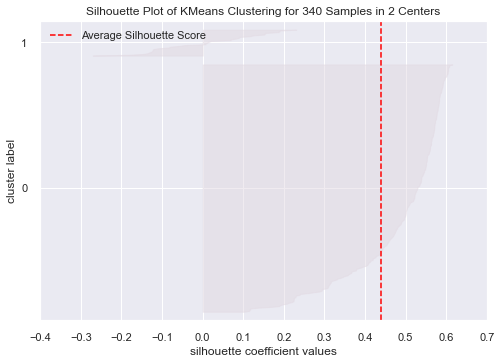

Number of Clusters: 3 	 Silhouetter Score: 0.4644405674779404


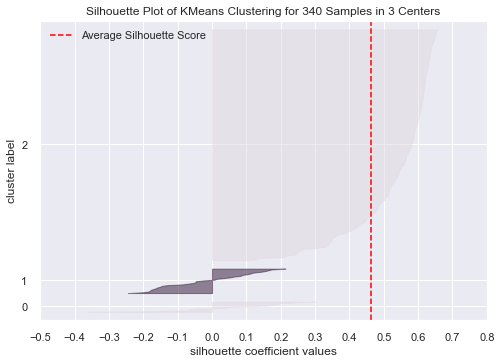

Number of Clusters: 4 	 Silhouetter Score: 0.4577225970476733


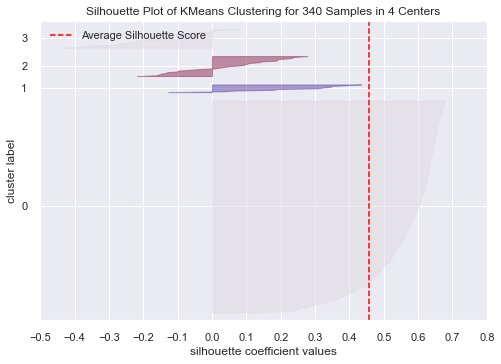

Number of Clusters: 5 	 Silhouetter Score: 0.43228336443659804


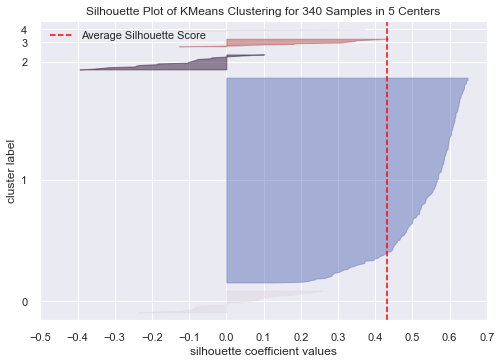

Number of Clusters: 6 	 Silhouetter Score: 0.4005422737213617


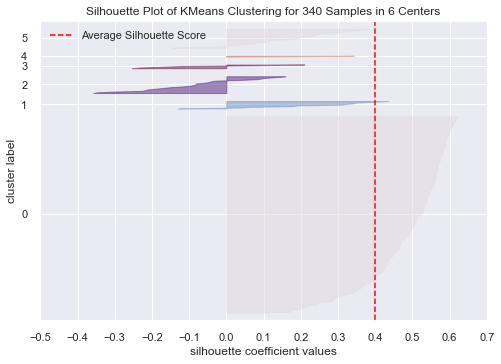

Number of Clusters: 7 	 Silhouetter Score: 0.3976335364987305


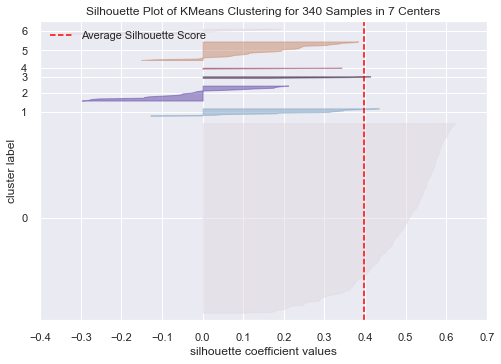

Number of Clusters: 8 	 Silhouetter Score: 0.40278401969450467


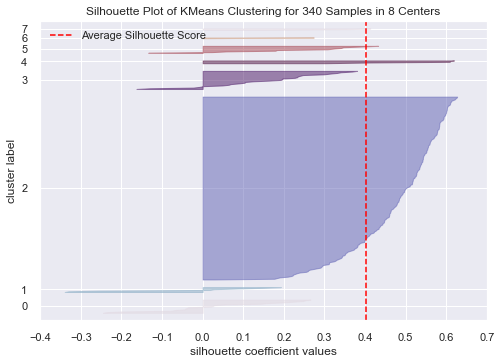

Number of Clusters: 9 	 Silhouetter Score: 0.3778585981433699


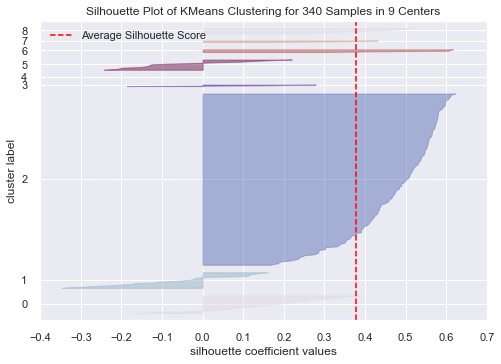

Number of Clusters: 10 	 Silhouetter Score: 0.13458938329968687


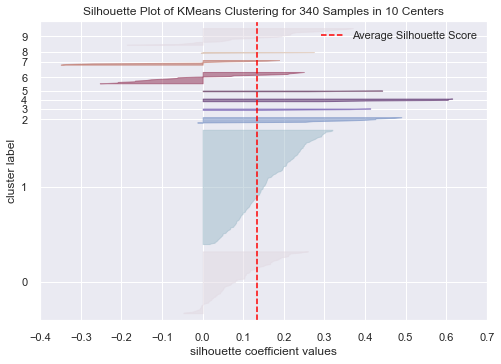

<IPython.core.display.Javascript object>

In [29]:
for i in range(2, 11):
    vis_sil = SilhouetteVisualizer(
        KMeans(n_clusters=i, random_state=1), colors="twilight"
    )  # creates silhouette visualizer for KMeans clusters from 2 to 9
    vis_sil.fit(
        subset_scaled_df
    )  # fits silhouette visualizer to scaled numeric dataframe
    print(
        "Number of Clusters:", i, "\t Silhouetter Score:", vis_sil.silhouette_score_,
    )  # prints silhouetter score for the particular number of clusters
    vis_sil.show()  # shows visual of silhouette of KMeans at set number of clusters

#### Observations:
- The Silhouette score seems to agree with the distortions, 8 is the best number of clusters.
- The SilhuoetteVisualizer shows that 8 has the tightest groups and the least amount of negative values for a silhuoette score.

### Cluster prediction

In [30]:
df8 = df.copy()  # copies original data to not chagne original data

grouping_KMeans_8 = KMeans(
    n_clusters=8, random_state=1
)  # creates KMeans clusters at 8 number of clusters

grouping_KMeans_8.fit(subset_scaled_df)  # fits model to scaled numeric data

df8[
    "KMeans_Groups"
] = grouping_KMeans_8.labels_  # adds column to original data with KMeans clusters

kmeans_df_8 = (
    subset_scaled_df.copy()
)  # creates copy of subset_scaled_df to not change scaled data for hierarchical clustering
kmeans_df_8[
    "KMeans_Groups"
] = grouping_KMeans_8.labels_  # adds column to subset_scaled data with KMeans clusters

df8.head()

Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  KMeans_Groups  
0                  6.681299e+08    3.718174  -8.784219              2  
1                  1.633016e+09   18.806350  -8.750068              2  
2                  1.504422e+09   15.275510  -0.394171              2  
3                  4.996437e+08   74.555557   4.199651              0  
4                  2.247994e+09  178.451613   1.059810              0

<IPython.core.display.Javascript object>

In [31]:
# creates profile with means of each column seperated by group
km_profile_8 = df8.groupby("KMeans_Groups").mean()

<IPython.core.display.Javascript object>

In [32]:
# adds column to profile counting the number of rows in each group
km_profile_8["count_per_group"] = (
    df8.groupby("KMeans_Groups")["GICS_Sector"].count().values
)

<IPython.core.display.Javascript object>

In [33]:
# highlights largest group for each column
km_profile_8.style.highlight_max(color="lightblue", axis=0)

<IPython.core.display.Javascript object>

In [34]:
def percentage_pie(data, col1, col2, h_pad=1.08, w_pad=1.08):

    """
    creates pie chart of percentage of col2 inside individual components of col1.
    
    data: DataFrame containing said features
    col1: feature number 1
    col2: feature number 2
    h_pad: height between subplots
    w_pad: width betweeen subplots
    """

    plt.figure(figsize=(20, 20))  # sets figure size

    cmap = plt.get_cmap("tab20c")  # gets cmap to create color palette later

    for i, sector in enumerate(
        data[col1].unique()
    ):  # grabs the value(sector) and the index(i) of the unique values in col1
        chart = []
        for group in data[data[col1] == sector][
            col2
        ].unique():  # iterates through all unique values(group) in col2, where col1 contains the above sector
            sect_group_perc = (
                data.groupby(col1)[col2].value_counts()[sector][group]
                / data.groupby(col1)[col2].value_counts()[sector].sum()
            ) * 100  # creates percentage of particular value in reference to total group
            chart.append(
                sect_group_perc
            )  # keeps percentages in a list to be used for pie chart

        plt.subplot(4, 3, i + 1)  # creates subplot
        patches, texts, autotexts = plt.pie(
            chart,
            autopct="%.2f%%",  # adds percentages to individual wedges
            pctdistance=0.75,
            labels=data.groupby(col1)[col2]
            .value_counts()[sector]
            .index,  # labels for pie chart are labels that are contained in the sector
            colors=cmap(np.arange(6) * 4),
            textprops={"size": "x-large", "weight": "bold"},
            radius=1.25,
            shadow=True,
        )  # creates individual pie chart
        plt.title(sector, fontdict={"fontsize": 20}, y=1.075)  # set title
        plt.setp(autotexts, size="large", weight="bold")

    plt.tight_layout(h_pad=h_pad, w_pad=w_pad)  # can control distances between subplots
    plt.show()  # show all subplots together as one plot

<IPython.core.display.Javascript object>

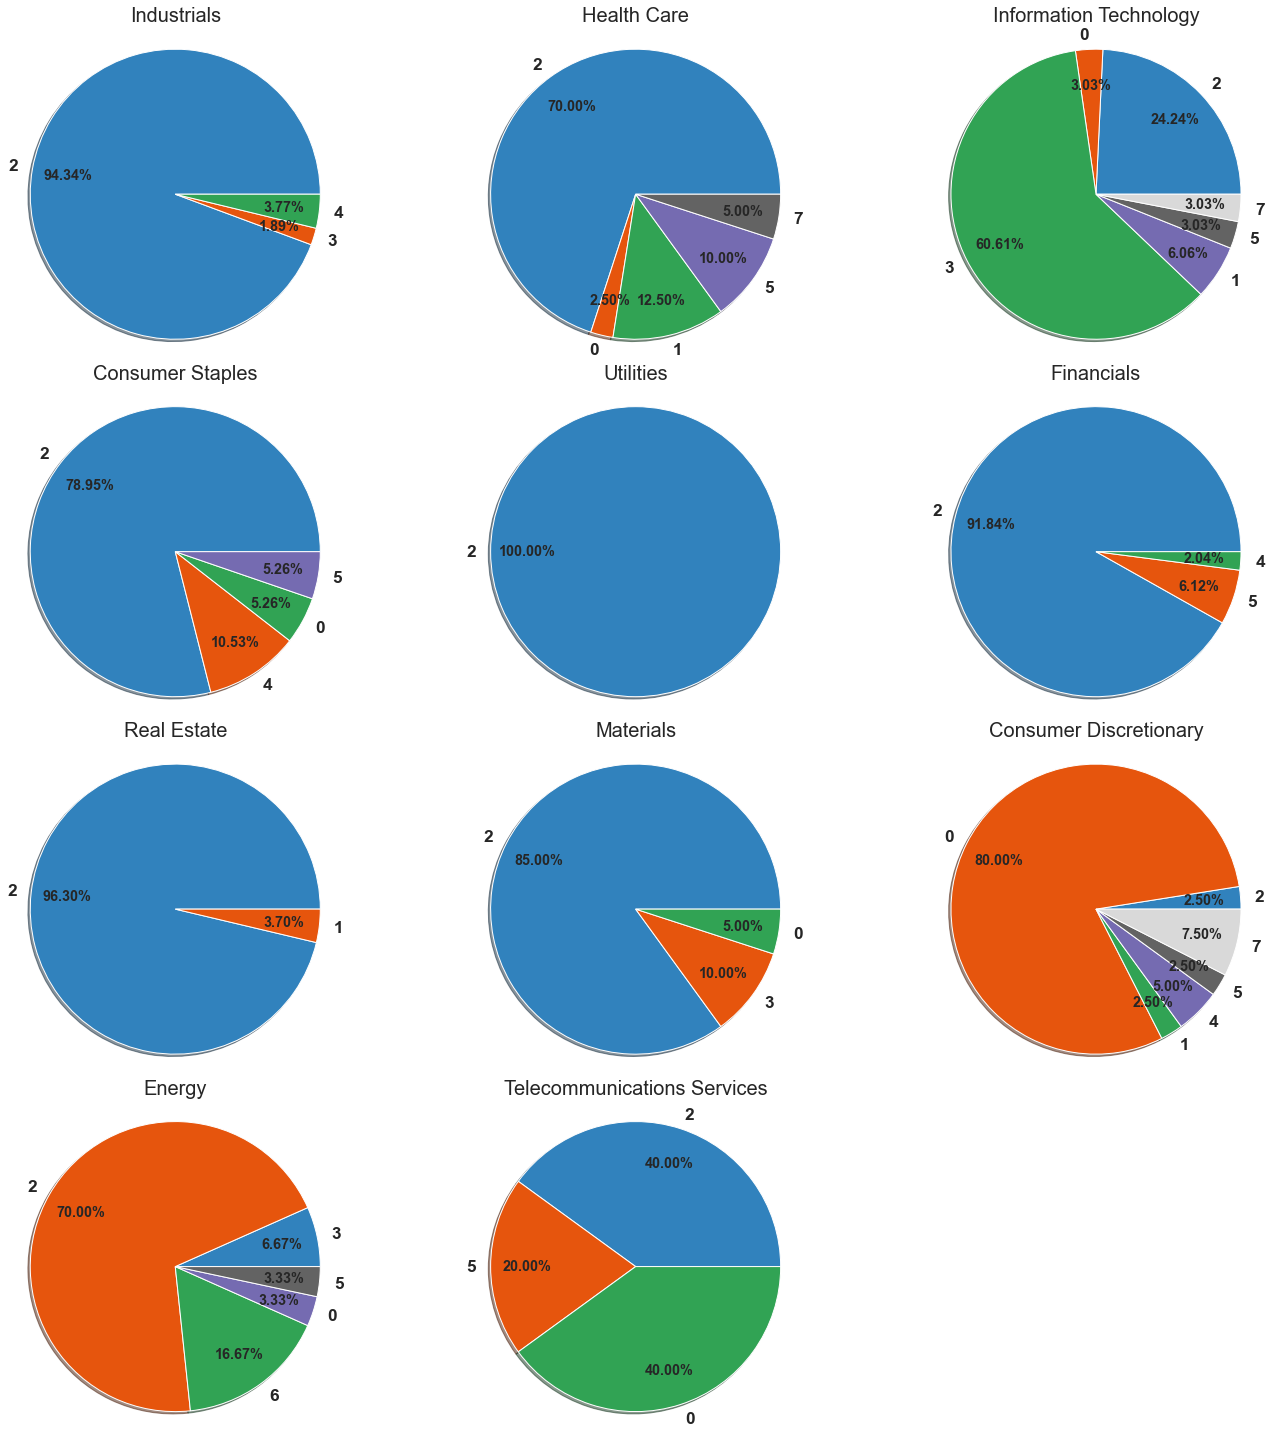

<IPython.core.display.Javascript object>

In [35]:
# diplays pie plot of percentage of groups inside each GCIS_Sector
percentage_pie(df8, "GICS_Sector", "KMeans_Groups")

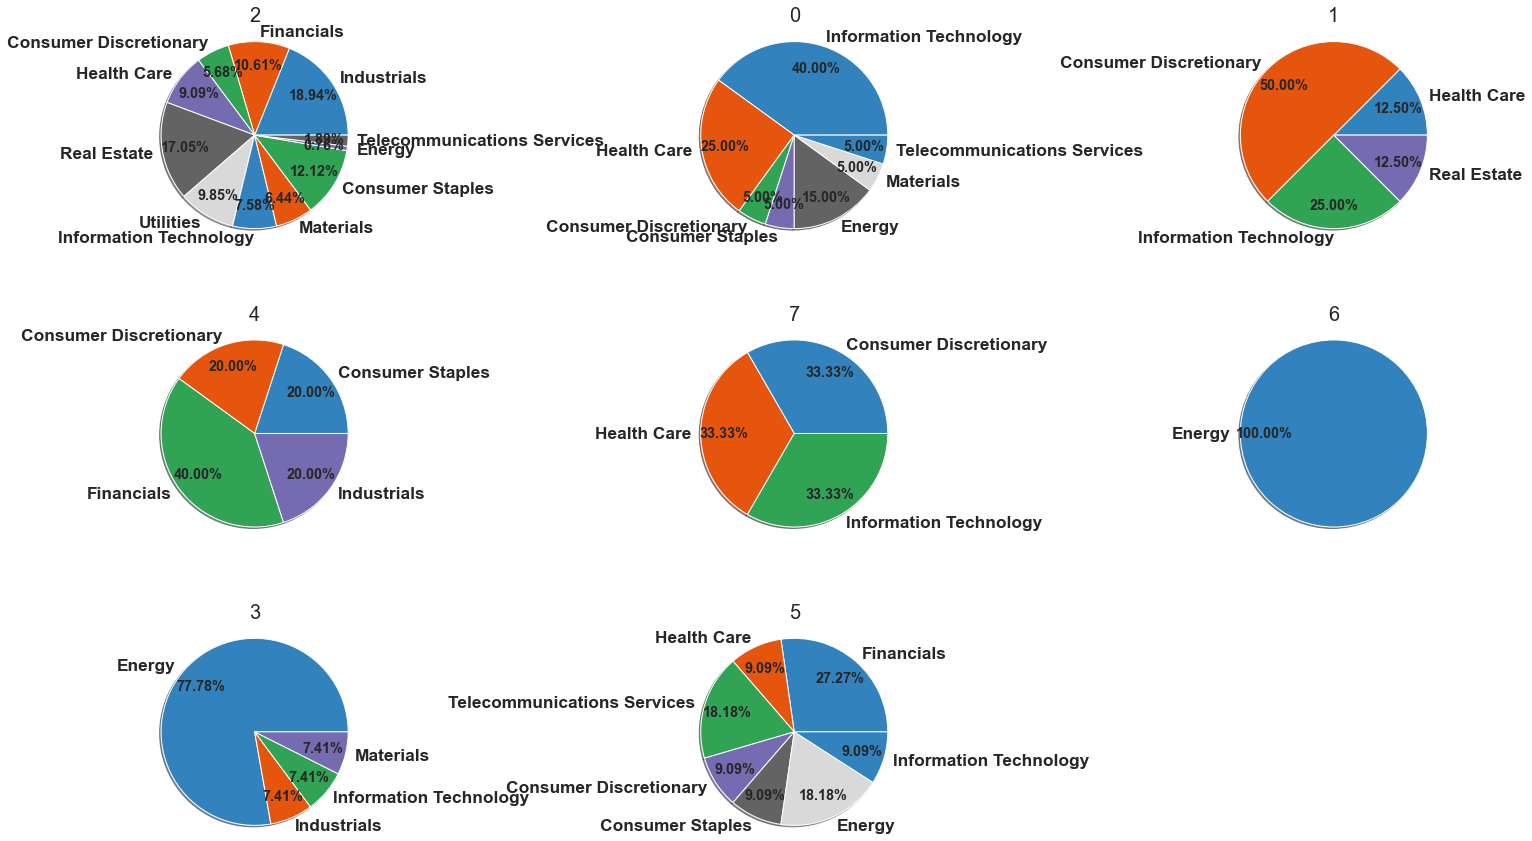

<IPython.core.display.Javascript object>

In [36]:
# diplays pie plot of percentage of sectors inside each KMeans_Groups
percentage_pie(df8, "KMeans_Groups", "GICS_Sector", w_pad=1, h_pad=-20)

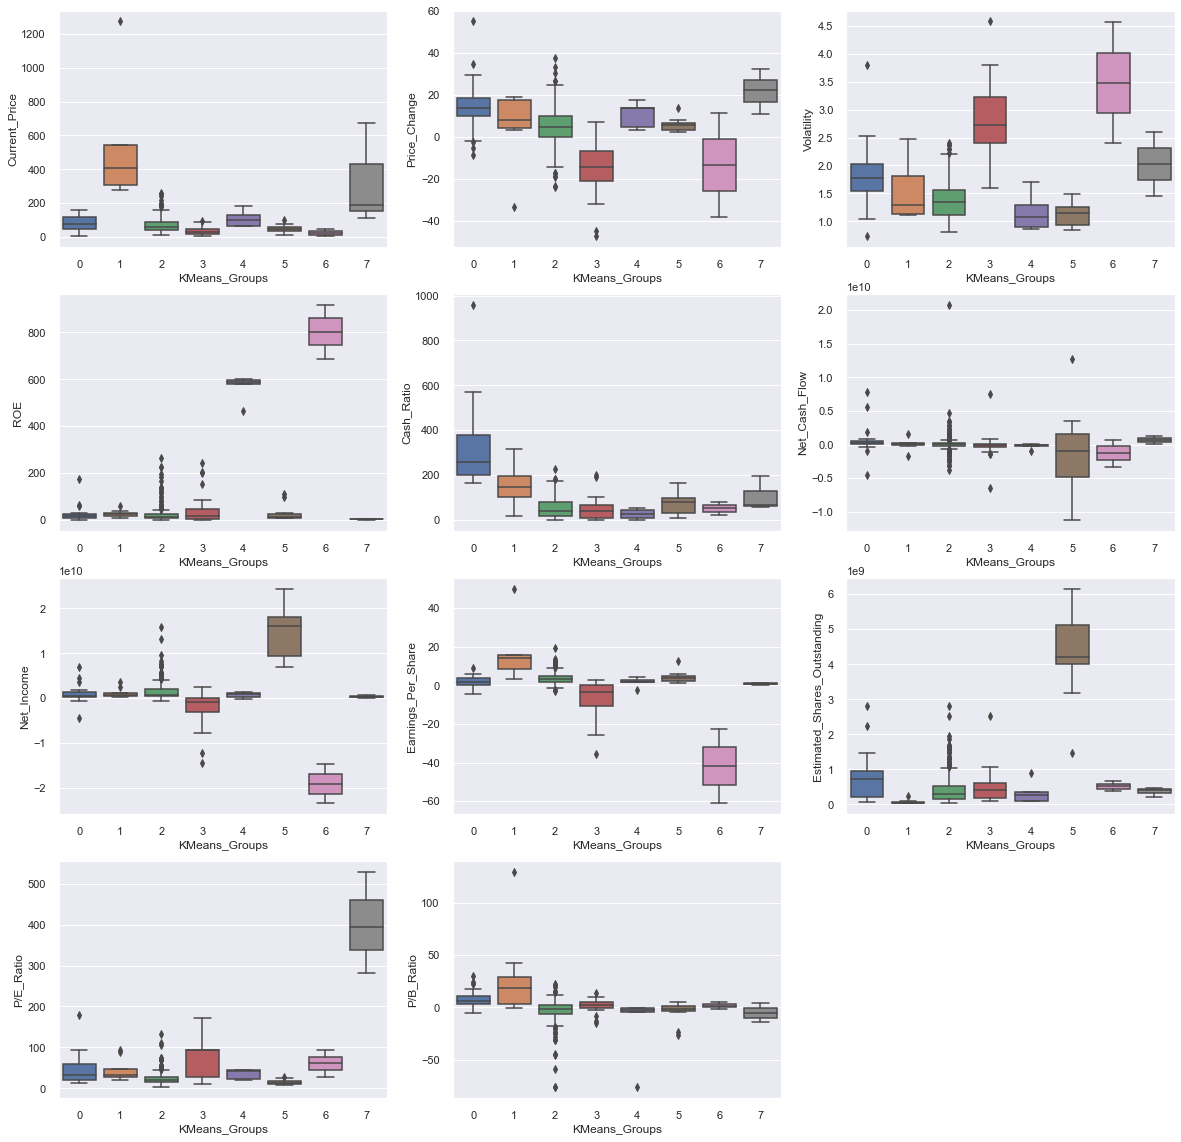

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df8[numeric_cols]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df8, y=col, x="KMeans_Groups"
    )  # displays boxplot for each sector by the groups made from KMeans
plt.show()

#### Observations:
- Group 2:
    - Group 2 contains the larget percentage of each sector aside from Consumer Discretionary and Information Technology.
    - Group 2 is also very balanced through all sectors, meaning it is the most general of all the groups.
    
    - Generalizes well in all features.
    
- Group 6:
    - Groups 6 specializes in Energy ane Energy alone.
    - while group 6 is only seen in Energy, it only contains about 17% of the Energy Sector.
    
    - Has highest ROE and Volatility.
    
- Group 7:
    - Group 7 is evenly split between Consumer Discretionary, Health Care, and Information Technology.
    - Group 7 holds small amounts(between 3%-8%) of each of its Sectors.
    
    - Specializes in P/E Ratio, and does well in Price Change and Current Price.
    
- Group 0:
    - Group 0 varies in the amount of sectors it is in. It is in 7 sectors, but holds the majority of its percentage in Informarion Technology.
    - Group 0 only makes up 3% of Information Technology. However, it makes up 80% and 40% of Consumer Discretionaries and Telecommunications Services respectively. These two sectors only make up 10% of Group 0 combined.
    
    - Contains highest price change and cash ratios.
    
- Group 1:
    - Group 1 is in 4 sectors, with most of its make up in Consumer Discretionaries.
    - Group 1 makes up 2.5% of Consumer Discretionaries meaning this is a very small and unique group.
    
    - Does the best in Current Price and P/B Ratios.
    
- Group 3:
    - Group 3 is made up of almost 78% by the Energy sector. It contains 4 sectors.
    - Group 3 makes up 7% of the Energy market, which means that this is a very small and unique group.
    
    - Group 3 has high Volatility.
    
- Group 4:
    - Group 4 is split slmost symmetrically 4 ways, with majority of this group in Financials.
    - Group 4 makes up 2% of Financials, 5% of Consumer Discretionaries, 10% of Consumer Staples, and 4% of Industrials. Group 4 is a small group generalizing between 4 sectors. 
    
    - Has second highest ROE.
    
- Group 5:
    - Group 5 is symetrically split between 7 sectors
    - Group 5 contains no more than 10% in all 7 sectors, except in 1 sector. It makes up 20% of the Telecommunications Services sector.
    
    - Specializes in Net Income and Estimated Shares Outstanding.
    

- Overall it seems that each group specializes in a particular feature, and Group 2 generalizes all features. This makes sense that Group 2 dominates the other groups when it comes to amount of data in each group.
- The data seems to be too dominated with one group and may need to be divided in to more clusters to have seperate more variety.

In [38]:
for n in range(1, 20):
    print("Number of Clusters: {}".format(n))
    model = KMeans(n_clusters=n, random_state=1)
    model.fit(subset_scaled_df)

    df_model = df.copy()
    df_model["KMeans_Groups"] = model.labels_
    print(df_model.groupby("KMeans_Groups")["Security"].count())

Number of Clusters: 1
KMeans_Groups
0    340
Name: Security, dtype: int64
Number of Clusters: 2
KMeans_Groups
0    307
1     33
Name: Security, dtype: int64
Number of Clusters: 3
KMeans_Groups
0     14
1     32
2    294
Name: Security, dtype: int64
Number of Clusters: 4
KMeans_Groups
0    277
1     11
2     27
3     25
Name: Security, dtype: int64
Number of Clusters: 5
KMeans_Groups
0     30
1    275
2     21
3     11
4      3
Name: Security, dtype: int64
Number of Clusters: 6
KMeans_Groups
0    270
1     11
2     24
3      6
4      2
5     27
Name: Security, dtype: int64
Number of Clusters: 7
KMeans_Groups
0    267
1     11
2     22
3      3
4      2
5     27
6      8
Name: Security, dtype: int64
Number of Clusters: 8
KMeans_Groups
0     20
1      8
2    264
3     27
4      5
5     11
6      2
7      3
Name: Security, dtype: int64
Number of Clusters: 9
KMeans_Groups
0     27
1     24
2    253
3      3
4      1
5     16
6      5
7      3
8      8
Name: Security, dtype: int64
Number of 

<IPython.core.display.Javascript object>

#### Observations:
- 10 and 11 clusters have the best variety. 
- 11 clusters has the higher silhuoette score, thus we will choose that amount of clusters for the next KMeans cluster.

In [39]:
df11 = df.copy()  # copies original data to not chagne original data

grouping_KMeans_11 = KMeans(
    n_clusters=11, random_state=1
)  # creates KMeans clusters at 8 number of clusters

grouping_KMeans_11.fit(subset_scaled_df)  # fits model to scaled numeric data

df11[
    "KMeans_Groups"
] = grouping_KMeans_11.labels_  # adds column to original data with KMeans clusters

kmeans_df_11 = (
    subset_scaled_df.copy()
)  # creates copy of subset_scaled_df to not change scaled data for hierarchical clustering
kmeans_df_11[
    "KMeans_Groups"
] = grouping_KMeans_11.labels_  # adds column to subset_scaled data with KMeans clusters

df11.head()

Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  KMeans_Groups  
0                  6.681299e+08    3.718174  -8.784219              7  
1                  1.633016e+09   18.806350  -8.750068              7  
2                  1.504422e+09   15.275510  -0.394171              7  
3                  4.996437e+08   74.555557   4.199651              7  
4                  2.247994e+09  178.451613   1.059810              3

<IPython.core.display.Javascript object>

In [40]:
# creates profile with means of each column seperated by group
km_profile_11 = df11.groupby("KMeans_Groups").mean()

<IPython.core.display.Javascript object>

In [41]:
# adds column to profile counting the number of rows in each group
km_profile_11["count_per_group"] = (
    df11.groupby("KMeans_Groups")["GICS_Sector"].count().values
)

<IPython.core.display.Javascript object>

In [42]:
# highlights largest group for each column
km_profile_11.style.highlight_max(color="lightblue", axis=0)

<IPython.core.display.Javascript object>

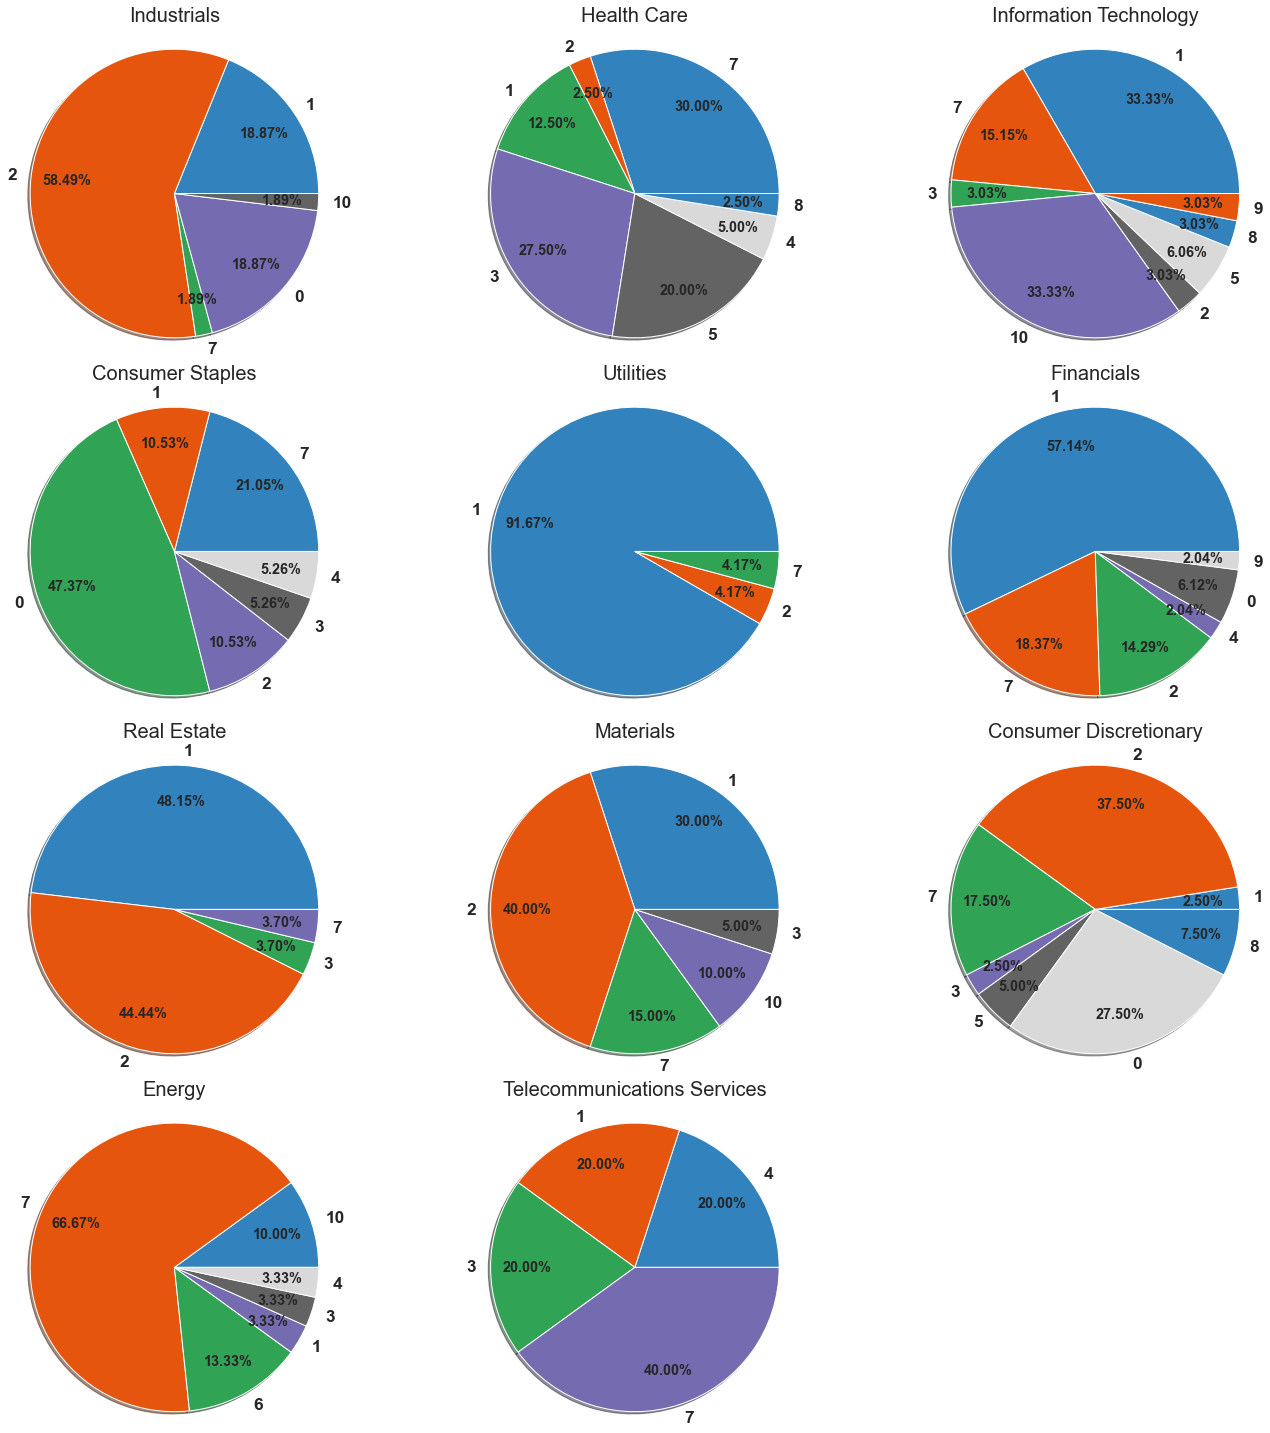

<IPython.core.display.Javascript object>

In [43]:
# diplays pie plot of percentage of groups inside each GCIS_Sector
percentage_pie(df11, "GICS_Sector", "KMeans_Groups")

In [44]:
df11["KMeans_Groups"].value_counts()

1     142
7      68
2      61
10     25
3      18
4       8
0       5
5       5
6       3
8       3
9       2
Name: KMeans_Groups, dtype: int64

<IPython.core.display.Javascript object>

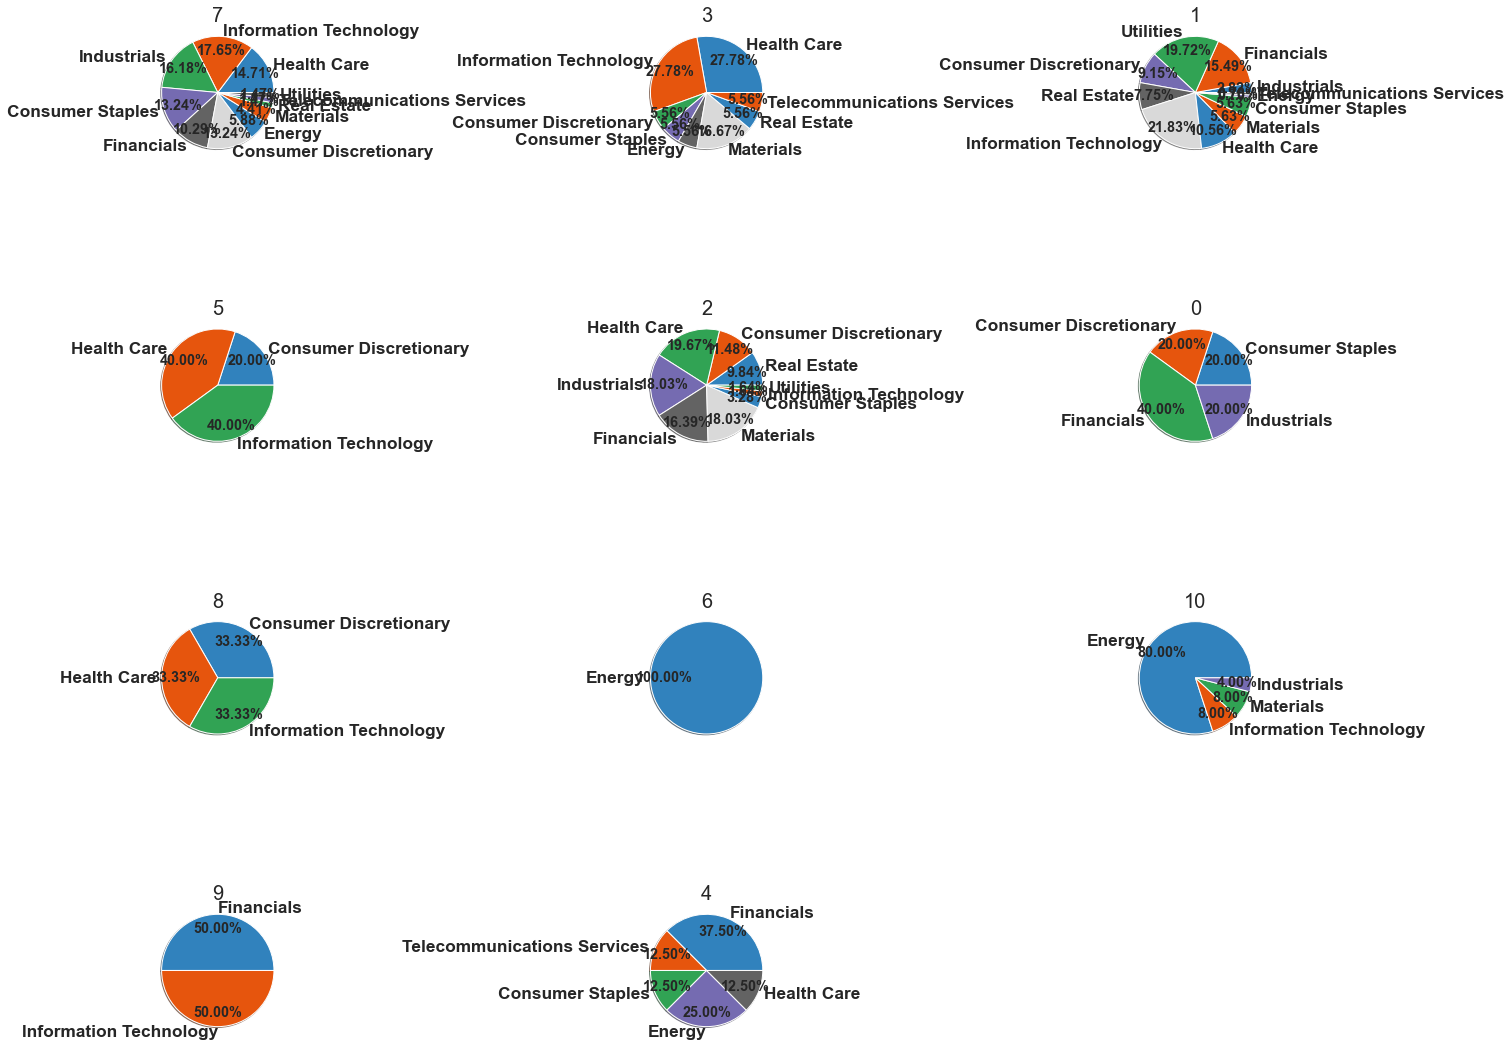

<IPython.core.display.Javascript object>

In [45]:
# diplays pie plot of percentage of sectors inside each KMeans_Groups
percentage_pie(df11, "KMeans_Groups", "GICS_Sector", w_pad=1, h_pad=-20)

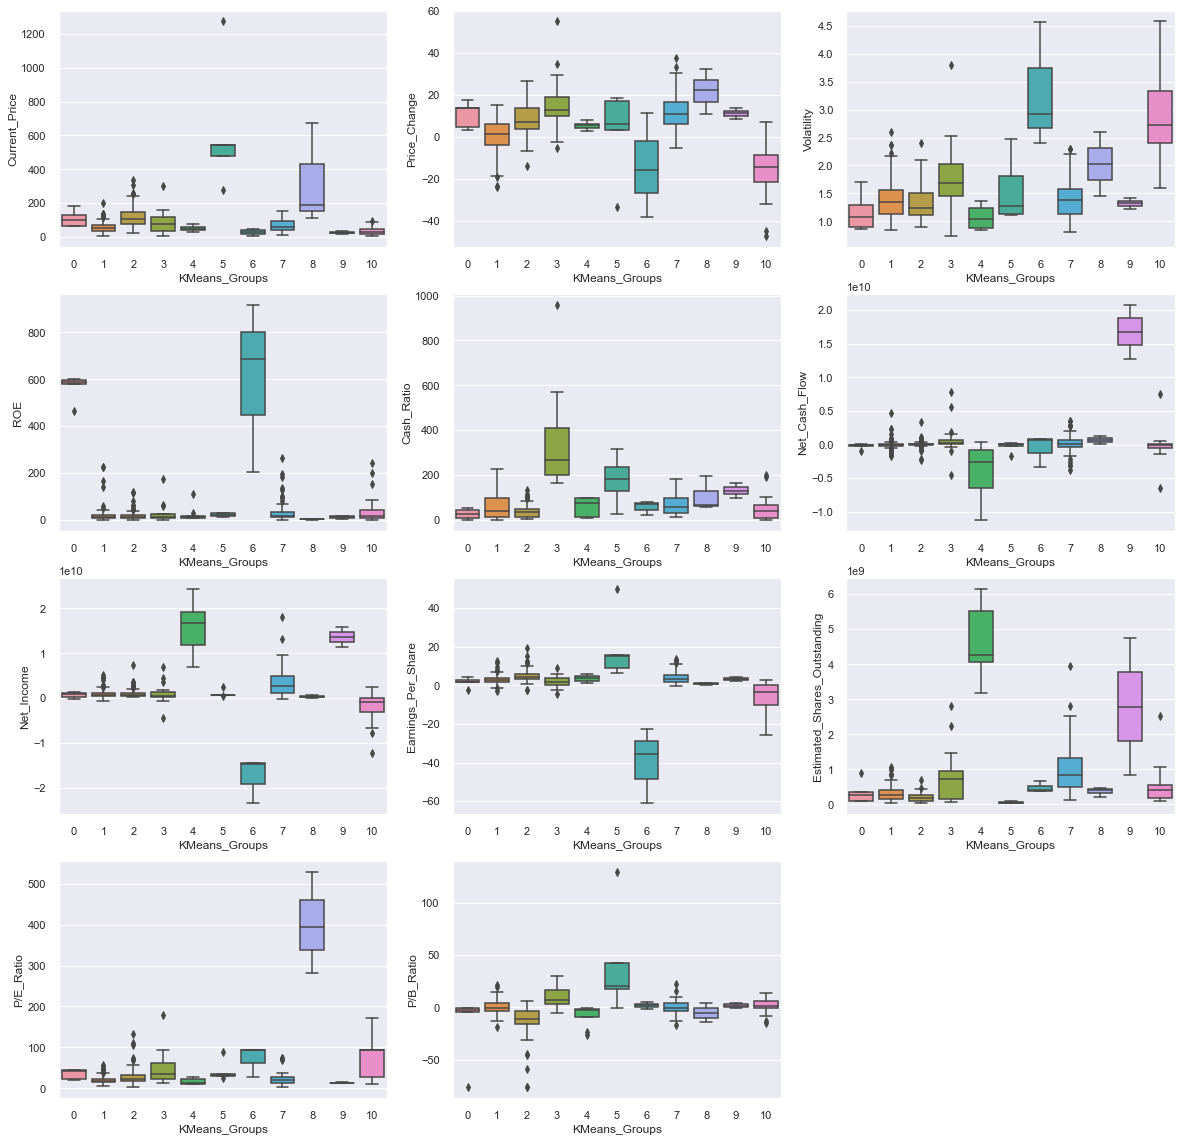

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df11[numeric_cols]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df11, y=col, x="KMeans_Groups"
    )  # displays boxplot for each sector by the groups made from KMeans
plt.show()

#### Observations:

- Group 0:
    - Group 0 varies in the amount of sectors it is in. It is in 4 sectors, but holds the majority of its percentage in Financials.
    - Group 0 only makes up 8% of Financials. However, it makes up 47%, 27%, and 19% of Consumer Staples, Consumer Discretionaries, and Industrials respectively. These three sectors only make up 20% of Group 0 each.
    
    - Generalizes well in all areas, with a low outlier in P/B Ratio.
    
- Group 1:
    - Group 1 is in 11 sectors, with most of its make up in Information Technology.
    - Group 1 makes up 33% of Information Technologies, 91% of Utilities, and 57% of Financials.
    - This group is the largest group, and can fit evenly in most areas.
    
    - Generalizes well in all features.

- Group 2:
    - Group 2 is in 9 sectors, with most of its make up in Health Care.
    - Group 2 makes up 2% of Health Care, 40% of Materials, and 14% of Financials.
    - This group is the third largest group, and specializes in a few small areas.
    
    - Generalizes well in all features.
    
- Group 3:
    - Group 3 is made up mostly by the Health Care and Information Technology sector, each contributing to 28% of group 3. It contains 8 sectors total.
    - Group 3 makes up 27% of the Health Care market and 3% of Information Technology.
    
    - Specializes in Cash Ratio, and contains two high outliers in Price Change.
    
- Group 4:
    - Group 4 is split slmost symmetrically 5 ways, with majority of this group in Financials.
    - Group 4 makes up 2% of Financials. Group 4 is a small group generalizing between 5 sectors. 
    
    - Specializes in Net Income and Estimated Shares Oustanding.
    
- Group 5:
    - Group 5 is symetrically split between 3 sectors
    - Group 5 makes up 20% in Health Care sector.
    
    - Specializes in P/B Ratio, with high outliers in current price and Earnings Per Share.
    
- Group 6:
    - Groups 6 specializes in Energy ane Energy alone.
    - while group 6 is only seen in Energy, it only contains about 13% of the Energy Sector.
    
    - Specializes in ROE and has a high Volatility.
    
- Group 7:
    - Group 7 is symmetrically split between 11 sectors, containing most of itself in the Information Technology sector at close to 18%.
    - Group 7 holds a good amounts(between 15%-40%) of 7 sectors.
    - It makes up 67% of the Energy sector.
    
    - Generalizes well in all areas.
        
- Group 8:
    - Group 8 is evenly split between 3 sectors(each containg 33% of group 8). The 3 sectors are Health Care, Consumer Discretionaries, and Information Technology.
    - Group 8 contains no more than  about 8% in all 3 sectors.
    
    - Specializes in P/E Ratio, with high values in Current Price and Price Change.
    
- Group 9:
    - Group 9 is evenly split between 2 sectors. Financials and Information Technology each make up 50% of group 9.
    - Group 9 contains no more than 3% in each sector.
    
    - Specializes in Net Cash Flow, with high values in Net Income and Estimated Shares Outstanding.
    
- Group 10:
    - Group 10 is dominated by the Energy sector(80%). It contains 3 other sectors as well.
    - Group 10 contains 10% in the Energy sector.
    
    - Specializes in Volatility.

- Overall it seems that each group generalizes well in most areas, with a few specializing in specific areas.
- The conclusion is that the number of clusters needs to be 8, seeing as how most of the clusters in 11 could have been combined to from one bigger cluster.

## Hierarchical Clustering

In [47]:
# list of linkage methods used for linkage
linkage_methods = [
    "single",
    "complete",
    "average",
    "weighted",
]

# list of distance metrics used for linkage
distance_metrics = [
    "euclidean",
    "mahalanobis",
    "chebyshev",
    "cityblock",
]

for dm in distance_metrics:  # iterates through each distance metric
    for lm in linkage_methods:  # iterates through each linkage method
        Z = linkage(
            subset_scaled_df, method=lm, metric=dm
        )  # creates linkage for determining cophentic correlation
        c, coph_dists = cophenet(
            Z, pdist(subset_scaled_df)
        )  # determines cophenetic correlation
        print(
            "For {} metric and {} method, cophentic distance: {}".format(
                dm.title(), lm, c
            )
        )
    print("\n")

For Euclidean metric and single method, cophentic distance: 0.9232271494002922
For Euclidean metric and complete method, cophentic distance: 0.7873280186580672
For Euclidean metric and average method, cophentic distance: 0.9422540609560814
For Euclidean metric and weighted method, cophentic distance: 0.8693784298129404


For Mahalanobis metric and single method, cophentic distance: 0.9259195530524589
For Mahalanobis metric and complete method, cophentic distance: 0.7925307202850003
For Mahalanobis metric and average method, cophentic distance: 0.9247324030159737
For Mahalanobis metric and weighted method, cophentic distance: 0.8708317490180426


For Chebyshev metric and single method, cophentic distance: 0.9062538164750717
For Chebyshev metric and complete method, cophentic distance: 0.598891419111242
For Chebyshev metric and average method, cophentic distance: 0.9338265528030499
For Chebyshev metric and weighted method, cophentic distance: 0.9127355892367


For Cityblock metric and si

<IPython.core.display.Javascript object>

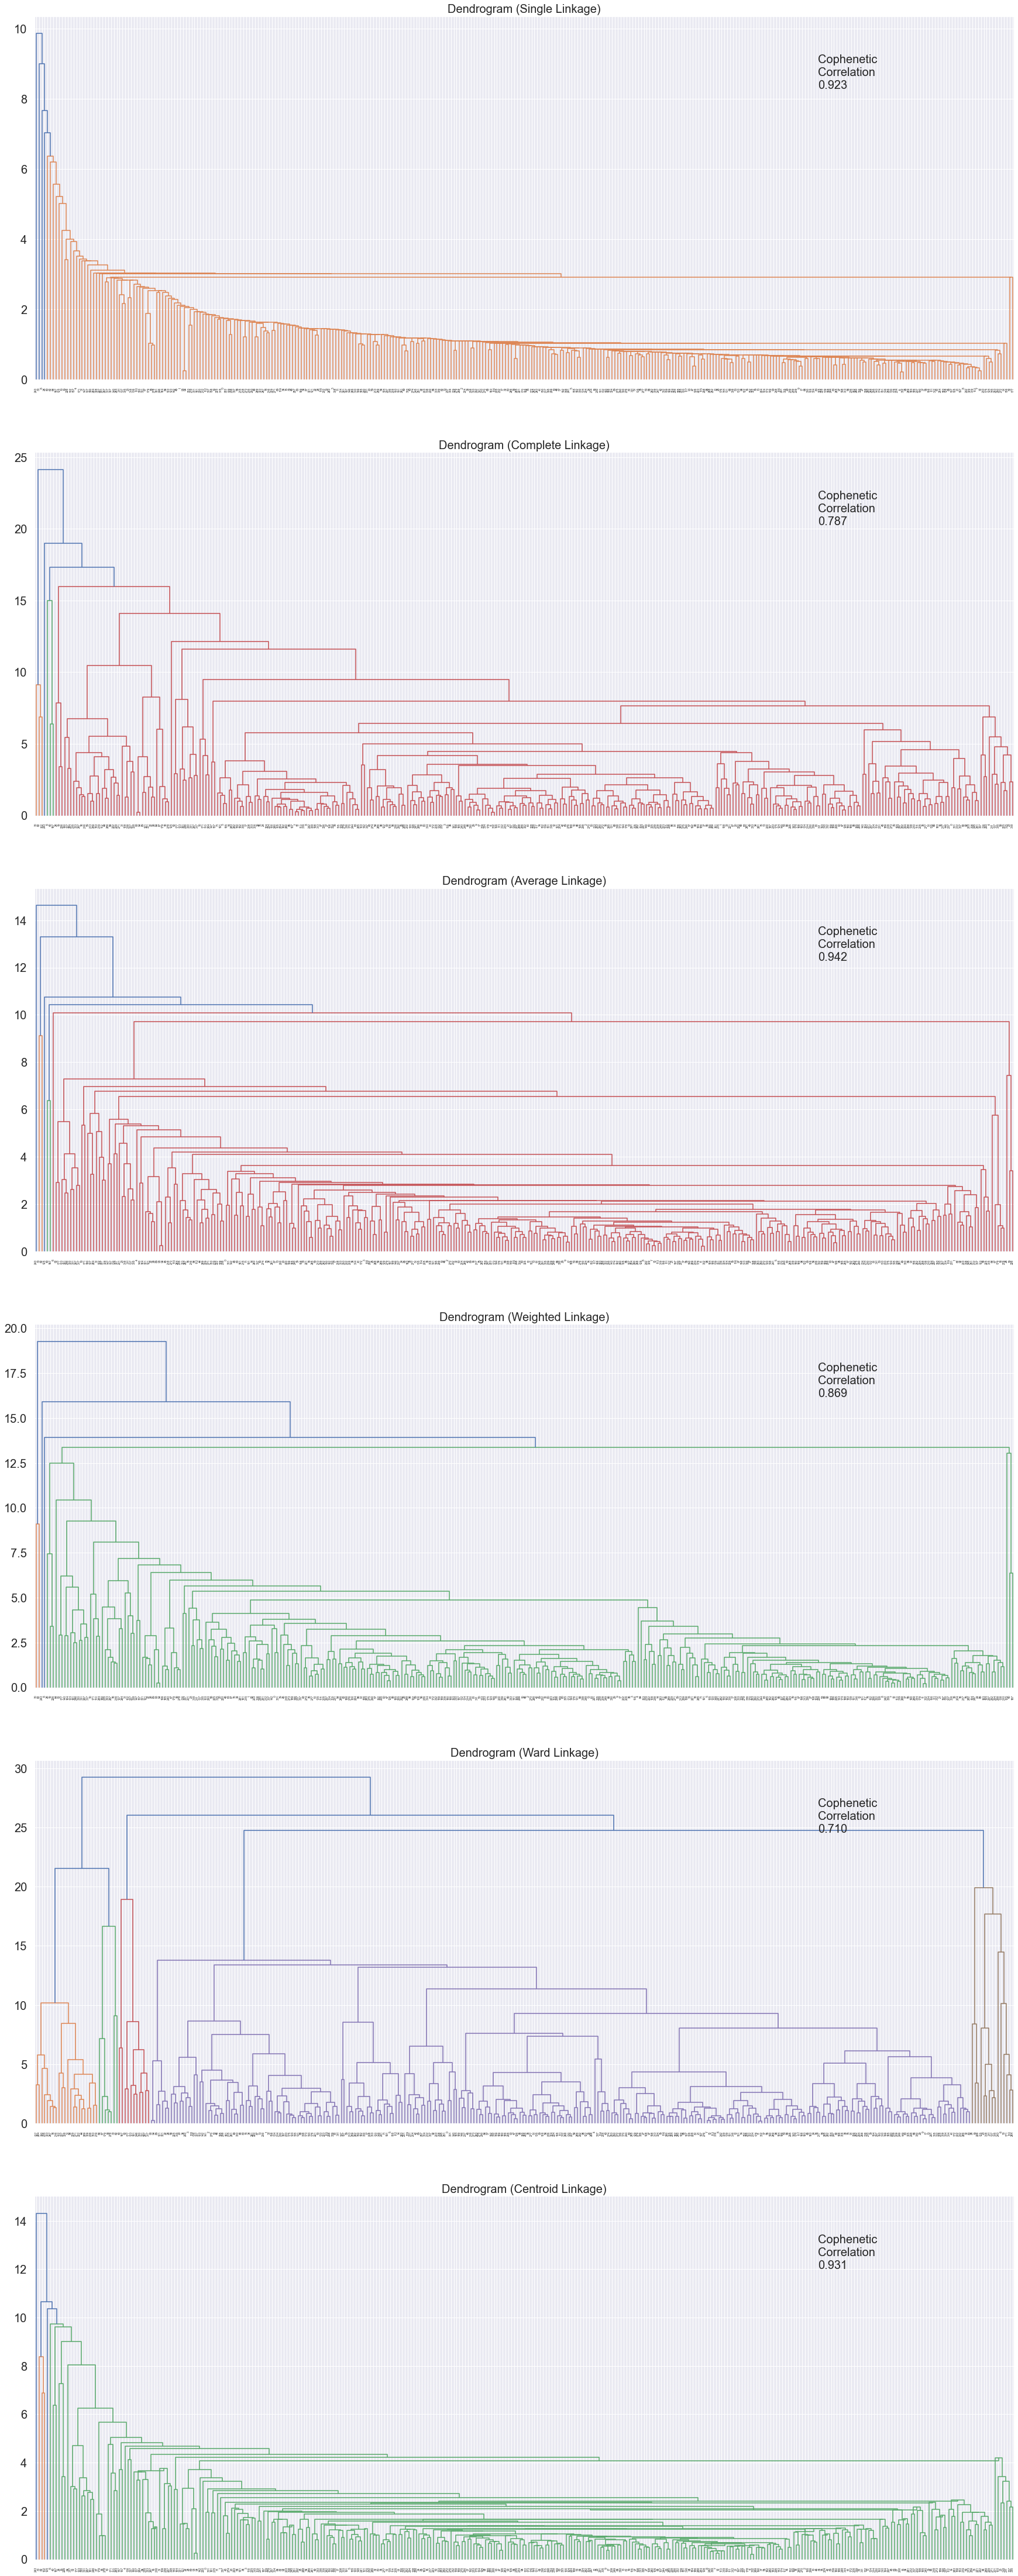

<IPython.core.display.Javascript object>

In [48]:
# list of linkage methods used for linkage
linkage_methods = [
    "single",
    "complete",
    "average",
    "weighted",
    "ward",
    "centroid",
]

# to create a subplot image
fig, ax = plt.subplots(len(linkage_methods), 1, figsize=(30, 80))


for i, method in enumerate(linkage_methods):  # iterates through each linkage method
    Z = linkage(
        subset_scaled_df, metric="euclidean", method=method
    )  # creates linkage for determining cophentic correlation

    dendrogram(Z, ax=ax[i])  # creates dendrogram plot
    ax[i].set_title(
        "Dendrogram ({} Linkage)".format(method.capitalize()), size=20
    )  # sets title for plot

    ax[i].yaxis.set_tick_params(labelsize=20)  # increase size of yticks

    coph_corr, coph_dist = cophenet(
        Z, pdist(subset_scaled_df)
    )  # determines cophenetic correlation
    ax[i].annotate(
        "Cophenetic\nCorrelation\n{:0.3f}".format(coph_corr),
        (0.80, 0.80),
        xycoords="axes fraction",
        size=20,
    )  # adds text box containing cophentic correlation

#### Observations:
- The cophentic correlation is the highest for average linkage at 0.942 thus, i will proceed with that linkage method for now.
    - The ideal number of clusters seems to be 7.

In [49]:
for n in range(1, 50):
    print("Number of Clusters: {}".format(n))
    HCmodel = AgglomerativeClustering(
        n_clusters=n, affinity="euclidean", linkage="average"
    )
    HCmodel.fit(subset_scaled_df)

    df_HC = df.copy()
    df_HC["Hier_Groups"] = HCmodel.labels_
    print(df_HC.groupby("Hier_Groups")["Security"].count())

Number of Clusters: 1
Hier_Groups
0    340
Name: Security, dtype: int64
Number of Clusters: 2
Hier_Groups
0    339
1      1
Name: Security, dtype: int64
Number of Clusters: 3
Hier_Groups
0    337
1      1
2      2
Name: Security, dtype: int64
Number of Clusters: 4
Hier_Groups
0    336
1      1
2      2
3      1
Name: Security, dtype: int64
Number of Clusters: 5
Hier_Groups
0    334
1      2
2      2
3      1
4      1
Name: Security, dtype: int64
Number of Clusters: 6
Hier_Groups
0    333
1      2
2      2
3      1
4      1
5      1
Name: Security, dtype: int64
Number of Clusters: 7
Hier_Groups
0      2
1      2
2      3
3      1
4      1
5      1
6    330
Name: Security, dtype: int64
Number of Clusters: 8
Hier_Groups
0      3
1      2
2    330
3      1
4      1
5      1
6      1
7      1
Name: Security, dtype: int64
Number of Clusters: 9
Hier_Groups
0    330
1      2
2      2
3      1
4      1
5      1
6      1
7      1
8      1
Name: Security, dtype: int64
Number of Clusters: 10
Hier_

Hier_Groups
0      16
1       2
2       7
3       2
4       5
5     255
6       3
7       2
8       2
9       2
10      1
11      2
12      2
13      3
14      3
15      1
16      2
17      3
18      1
19      2
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      4
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
Name: Security, dtype: int64
Number of Clusters: 42
Hier_Groups
0       2
1       5
2       7
3       2
4      11
5     255
6       3
7       2
8       2
9       2
10      1
11      2
12      2
13      3
14      3
15      1
16      2
17      3
18      1
19      2
20      5
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      4
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      1
39      1
40      1
41      1
Name: Security, dtype: int64
Number of Clusters: 43
Hier_Groups
0       7
1       5
2     255


<IPython.core.display.Javascript object>

####  Observations:
- There seems to be no real clustering seperation for the "average" linkage method at 50 clusters.
- I will try to see if "ward" has a better result.

In [50]:
for n in range(1, 20):
    print("Number of Clusters: {}".format(n))
    HCmodel = AgglomerativeClustering(
        n_clusters=n, affinity="euclidean", linkage="ward"
    )
    HCmodel.fit(subset_scaled_df)

    df_HC = df.copy()
    df_HC["Hier_Groups"] = HCmodel.labels_
    print(df_HC.groupby("Hier_Groups")["Security"].count())

Number of Clusters: 1
Hier_Groups
0    340
Name: Security, dtype: int64
Number of Clusters: 2
Hier_Groups
0    311
1     29
Name: Security, dtype: int64
Number of Clusters: 3
Hier_Groups
0    300
1     29
2     11
Name: Security, dtype: int64
Number of Clusters: 4
Hier_Groups
0     29
1     15
2     11
3    285
Name: Security, dtype: int64
Number of Clusters: 5
Hier_Groups
0     15
1      7
2     11
3    285
4     22
Name: Security, dtype: int64
Number of Clusters: 6
Hier_Groups
0     11
1      7
2     12
3    285
4     22
5      3
Name: Security, dtype: int64
Number of Clusters: 7
Hier_Groups
0     12
1      7
2      9
3    285
4     22
5      3
6      2
Name: Security, dtype: int64
Number of Clusters: 8
Hier_Groups
0      7
1      6
2      9
3    285
4     22
5      3
6      2
7      6
Name: Security, dtype: int64
Number of Clusters: 9
Hier_Groups
0      6
1    285
2      9
3      2
4     22
5      3
6      2
7      6
8      5
Name: Security, dtype: int64
Number of Clusters: 10
Hier_

<IPython.core.display.Javascript object>

In [51]:
# create agglomerative clustering model
HCmodel = AgglomerativeClustering(n_clusters=12, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)  # fit model to scaled numerical columns.

AgglomerativeClustering(n_clusters=12)

<IPython.core.display.Javascript object>

In [52]:
# creates copy of data frame
df_HC = df.copy()

# adds column to data frame with cluster numbers for each row
df_HC["Hier_Groups"] = HCmodel.labels_

# creates copy of data frame
hierarch_scaled_df = subset_scaled_df.copy()

# adds column to data frame with cluster numbers for each row
hierarch_scaled_df["Hier_Groups"] = HCmodel.labels_

df_HC.head()

Ticker_Symbol                 Security             GICS_Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS_Sub_Industry  Current_Price  Price_Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated_Shares_Outstanding   P/E_Ratio  P/B_Ratio  Hier_Groups  
0                  6.681299e+08    3.718174  -8.784219            0  
1                  1.633016e+09   18.806350  -8.750068            2  
2                  1.504422e+09   15.275510  -0.394171            2  
3                  4.996437e+08   74.555557   4.199651            2  
4                  2.247994e+09  178.451613   1.059810            0

<IPython.core.display.Javascript object>

#### Observations:
- There seems to be seperation of values in ward lainkage at 12 clusters. This is the method and metric we will use for hierarchical clustering.

### Hierarchical Cluster Profile

In [53]:
hc_profile = df_HC.groupby("Hier_Groups").mean()

# adds column to profile counting the number of rows in each group
hc_profile["count_per_group"] = (
    df_HC.groupby("Hier_Groups")["GICS_Sector"].count().values
)

<IPython.core.display.Javascript object>

In [54]:
# highlights largest group for each column
hc_profile.style.highlight_max(color="lightblue", axis=0)

<IPython.core.display.Javascript object>

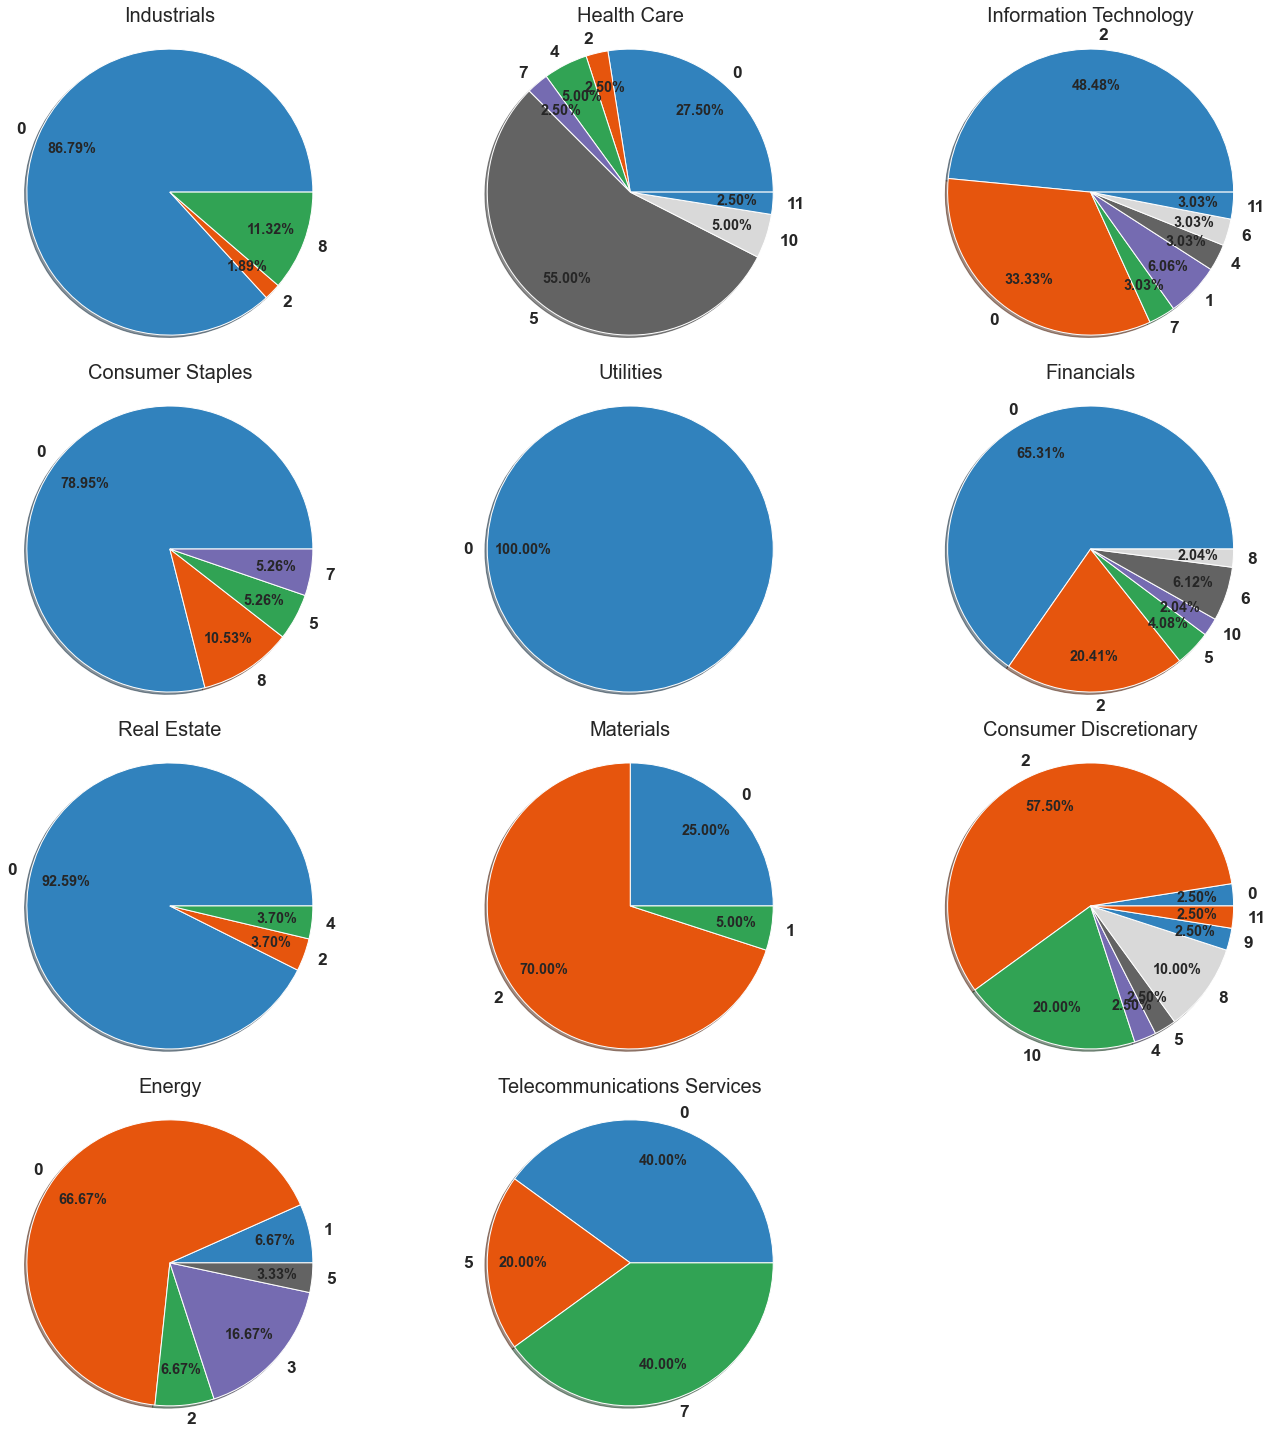

<IPython.core.display.Javascript object>

In [55]:
# diplays pie plot of percentage of sectors inside each KMeans_Groups
percentage_pie(df_HC, "GICS_Sector", "Hier_Groups")

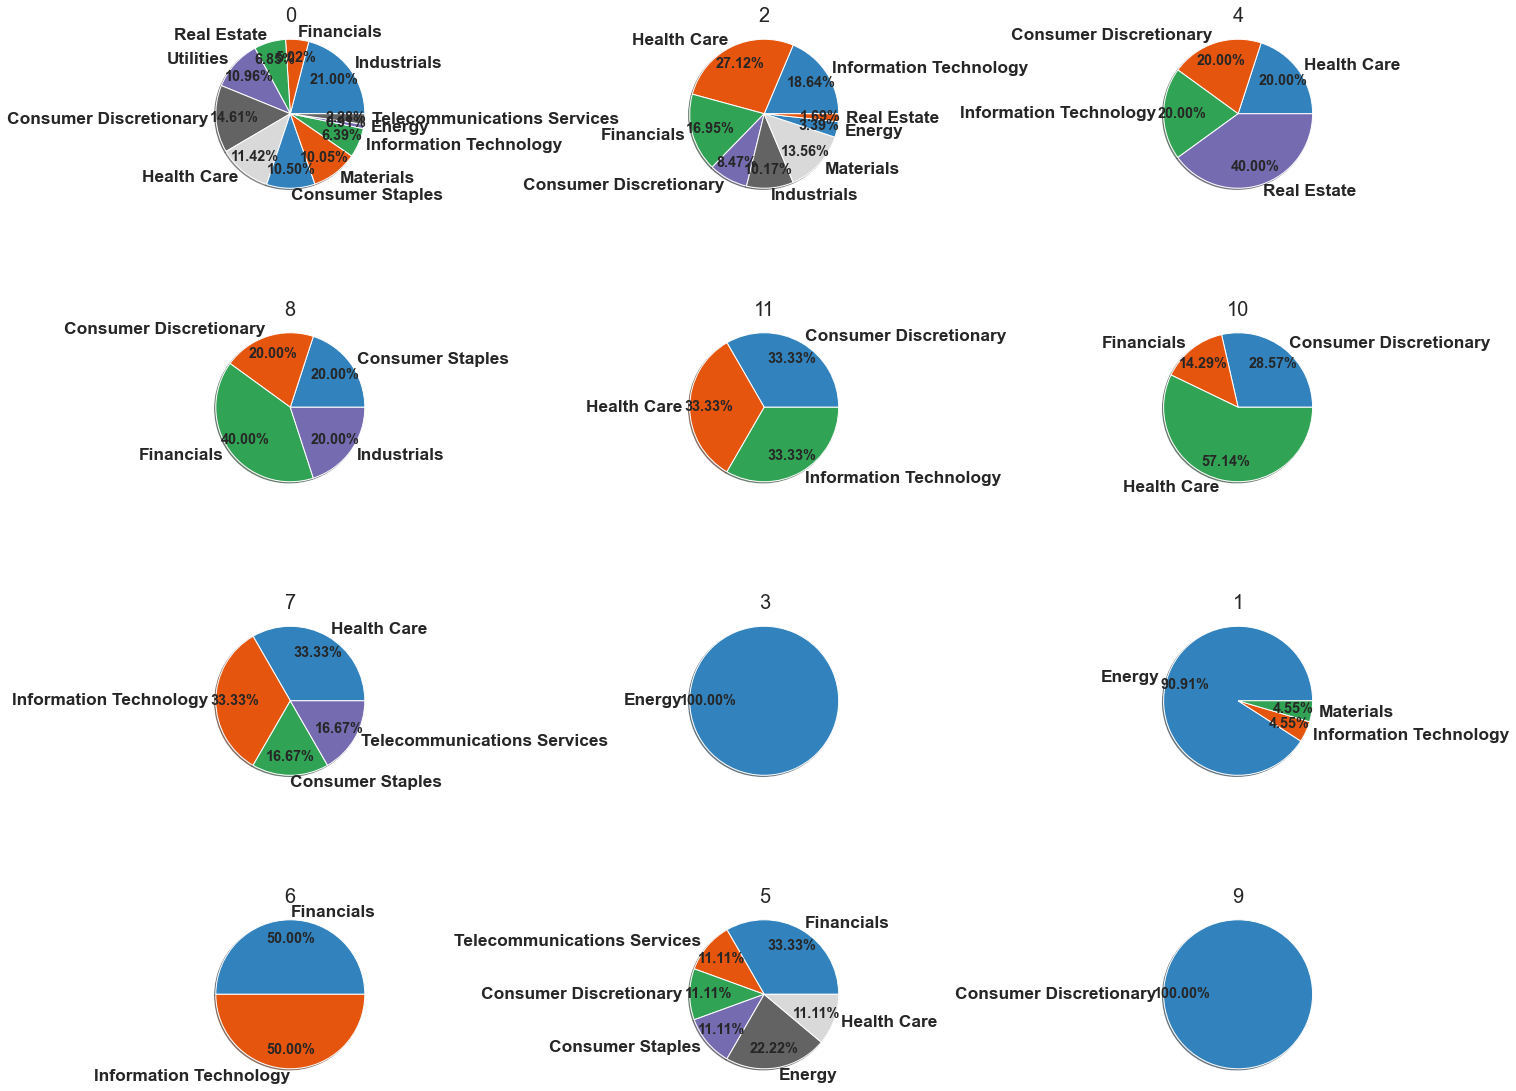

<IPython.core.display.Javascript object>

In [56]:
# diplays pie plot of percentage of sectors inside each KMeans_Groups
percentage_pie(df_HC, "Hier_Groups", "GICS_Sector", w_pad=1, h_pad=-20)

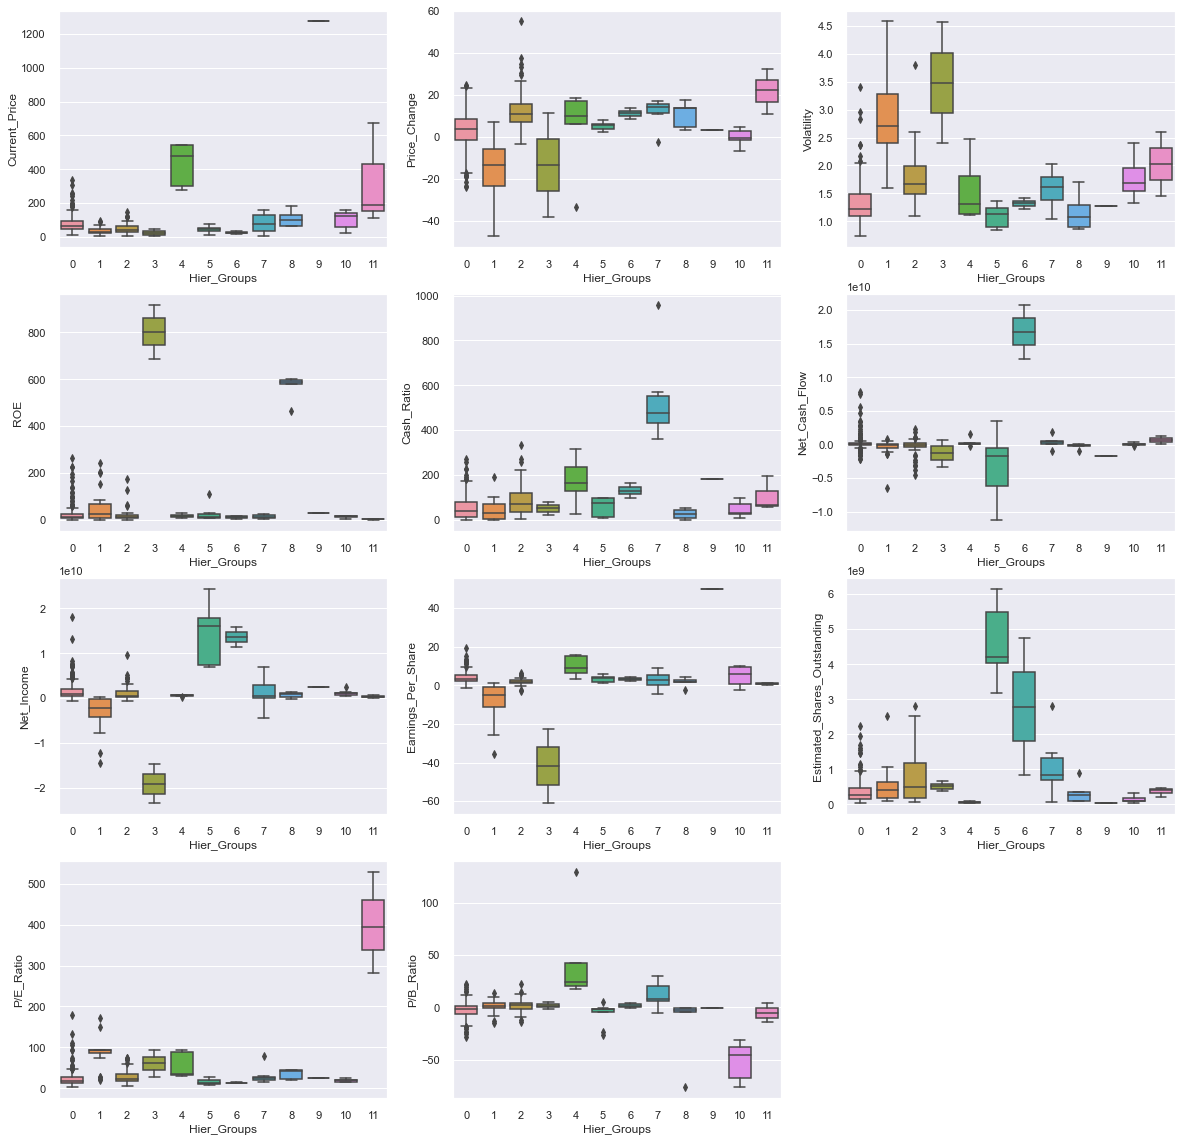

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_HC[numeric_cols]):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(
        data=df_HC, y=col, x="Hier_Groups"
    )  # displays boxplot for each sector by the groups made from KMeans
plt.show()

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How do the silhouette scores vary?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

### 1. Which clustering technique took less time for execution?

In [58]:
%timeit [KMeans(n_clusters=11, random_state=1)]

2.67 µs ± 393 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<IPython.core.display.Javascript object>

In [59]:
%timeit [AgglomerativeClustering(n_clusters=12, affinity="euclidean", linkage="ward")]

2.57 µs ± 267 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


<IPython.core.display.Javascript object>

#### Observations:
- KMeans clustering has a faster runtime, but it is almost negligible as they are both fast with the current data set. For a much larger data set choose KMeans.

### 2. Which clustering technique gave you more distinct clusters, or are they the same?

#### Observations:
- KMeans seems to have given more distinct clusters.

### 3. How do the silhouette scores vary?

In [61]:
print(
    "Silhuoette Score for KMeans is: ",
    silhouette_score(subset_scaled_df, grouping_KMeans_8.fit_predict(subset_scaled_df)),
)

print(
    "Silhuoette Score for Hierarchical Clustering is: ",
    silhouette_score(subset_scaled_df, HCmodel.fit_predict(subset_scaled_df)),
)

Silhuoette Score for KMeans is:  0.40278401969450467
Silhuoette Score for Hierarchical Clustering is:  0.16279644254791684


<IPython.core.display.Javascript object>

#### Observations:
- The KMeans clustering method results in a higher silhouette score meaning it better fits the information.

- The Hierarchical clustering method may have yielded a higher silhouette score had it used the "average" linkage method, but that result yielded one large group containing almost all the data. That method is redundant and would be no different then having no clusters.

### 4. How many observations are there in the similar clusters of both algorithms?

In [62]:
# highlights largest group for each column
km_profile_8.style.highlight_max(color="lightblue", axis=0)

<IPython.core.display.Javascript object>

In [64]:
# highlights largest group for each column
hc_profile.style.highlight_max(color="lightblue", axis=0)

<IPython.core.display.Javascript object>

#### Observations:
- The clustering algorithms share 3 clusters exactly and 5 more that are similar. This means that they share a total of 8 clusters, or all the clusters in the KMeans clustering algorithm.

### 5. How many clusters are obtained as the appropriate number of clusters from both algorithms?

- The KMeans Clustering algorigthm determined to have 8 clusters as the appropriate amount of clusters.

- The Hierarchical Clustering algorithm was selected as 12 to be the correct number of clusters.

## Actionable Insights and Recommendations

The `KMeans` clustering method with 8 clusters should be selected for clustering this data.

Breakdown per group:
- Group 0:
    - Specializes in Cash Ratio specifically and has a high Price Change
    - This group contains about `6%` of the data. Meaning only 6% of the data is aimed towards Cash Ratio.
    
    
- Group 1:
    - Specializes in P/B Ratio with a high value in Current Price.
    - This group contains about `2%` of the data.
    - It contains a high outlier(Priceline) for Current Price.
    - It contains a high outlier(Alliance Data Systems) for P/B Ratios.
    - These two outliers may be the reason for the high values in those fields. Reccomend adding more data to clear that confusion up.
    - Should not recomend this group, considering the high P/B Ratio means the stock is currently over valued.
    
    
- Group 2:
    - Is the most safe and generalized group. Pick this group for investors that want a safe and conservative return.
    - This group contains about `77%` of the stocks.
    
    
- Group 3:
    - Specializes in Volatility.
    - Recommend this to a customer that watches the market dilligently and knows when to pull out of the market. Has the chance to return the highest amount of profit, but can also lose the most amount of money.
    - This group contains about `8%` of the stocks.
    
    
- Group 4:
    - Specializes in ROE
    - This is a safer bet then for Group 3 or 6. It will not have the highest possible returns that group 3 and 6 can have, but it will be safer in that these stocks will not be suscaptible to drastic drops in return.
    - Should be most recommended for customers seeking a low, but safe return.
    - This group contains about `1%` of the stocks.
    
    
- Group 5:
    - Specializes in both Net Income and Estimated Shares Outstanding.
    - This should be the most recommended group. It contains stocks that are undervalued, considering the net income is so high, yet the current price is so low.
    - This group contains about `3%` of the stocks.
    
    
- Group 6:
    - Is a combination of both high ROE and high Volatility.
    - This should be recommended over group 3, unless the investor is adamant about investing and taking the biggest risk possible.
    - This group contains about `1%` of the data.
    
    
- Group 7:
    - Specializes in high P/E Ratio, and also contains a high current price.
    - This group contains about `1%` of the stocks.
    - Should not recomend this group, considering the high P/E Ratio means the stock is currently over valued.


Group 5 should be picked most often for investors. Group 4 is best for investors seeking a low yet safe return. Group 6 should be recommended for those that are seeking to gain the most return and risk their money the most.
- Highest risk - `Group 6`
- Most safe - `Group 4`
- Overall best results - `Group 5`
